In [1]:
import pandas as pd
import numpy as np
import os

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Read the CSV file
df = pd.read_csv(r'/root/autodl-tmp/clean AAC concrete dataset large ratio.csv')

# Remove the row where the "Ref." column equals "[107]"
df = df[df["Ref."] != "[107]"]

# Define original feature columns and target columns
original_feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

target_cols = ["7d CS", "28d CS"]

# Drop unwanted columns: "MnO", "Initial curing time (day)", "Initial curing rest time (day)"
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df = df.drop(columns=cols_to_drop)

# Update the feature columns list accordingly (remove dropped columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Convert target columns to numeric (replacing empty strings with NaN)
for col in target_cols:
    df[col] = pd.to_numeric(df[col].replace(' ', np.nan), errors='coerce')

# Print missing values in target columns
print("Missing values in target columns:")
print(df[target_cols].isnull().sum())

# Drop rows with missing target values
df_clean = df.dropna(subset=target_cols)
print(f"Dataset shape after dropping rows with missing targets: {df_clean.shape}")

# Fill missing values in specific feature columns using the median
df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())

# Extract feature and target arrays
X = df_clean[feature_cols].values
y_7 = df_clean["7d CS"].values
y_28 = df_clean["28d CS"].values

print("X shape:", X.shape)
print("y_7 shape:", y_7.shape)
print("y_28 shape:", y_28.shape)


Current working directory: /root/autodl-tmp
Missing values in target columns:
7d CS     621
28d CS    667
dtype: int64
Dataset shape after dropping rows with missing targets: (603, 73)
X shape: (603, 22)
y_7 shape: (603,)
y_28 shape: (603,)


/tmp/ipykernel_2005/2010036162.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
/tmp/ipykernel_2005/2010036162.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Display summary statistics to check scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print("Summary statistics for scaled features:")
print(scaled_df.describe().loc[['mean', 'std']].T)


Summary statistics for scaled features:
                                 mean      std
SiO2                    -3.004783e-16  1.00083
Al2O3                   -2.356692e-17  1.00083
Fe2O3                    0.000000e+00  1.00083
CaO                      1.178346e-16  1.00083
MgO                     -1.060512e-16  1.00083
Na2O                     1.178346e-17  1.00083
K2O                     -2.121023e-16  1.00083
SO3                     -1.060512e-16  1.00083
TiO2                    -4.713385e-17  1.00083
P2O5                    -1.178346e-16  1.00083
SrO                      0.000000e+00  1.00083
Mn2O3                    2.356692e-17  1.00083
LOI                      3.535038e-17  1.00083
AL/B                     3.004783e-16  1.00083
SH/SS                   -4.713385e-17  1.00083
Ms                       4.713385e-16  1.00083
Ag/B                     2.651279e-16  1.00083
W/B                      1.001594e-16  1.00083
Sp/B                    -5.891731e-17  1.00083
Initial curing temp 

In [3]:
# Check missing values in the original DataFrame for feature and target columns
print("Missing values in original DataFrame:")
print(df[feature_cols + target_cols].isnull().sum())

# Check missing values in cleaned DataFrame
print("Missing values in cleaned DataFrame:")
print(df_clean[feature_cols + target_cols].isnull().sum())


Missing values in original DataFrame:
SiO2                         0
Al2O3                        0
Fe2O3                        0
CaO                          0
MgO                          0
Na2O                         1
K2O                          2
SO3                          0
TiO2                         0
P2O5                         0
SrO                          0
Mn2O3                        0
LOI                          0
AL/B                         0
SH/SS                        0
Ms                           0
Ag/B                         0
W/B                          0
Sp/B                         0
Initial curing temp (C)      1
Final curing temp (C)        0
Concentration (M) NaOH      18
7d CS                      621
28d CS                     667
dtype: int64
Missing values in cleaned DataFrame:
SiO2                       0
Al2O3                      0
Fe2O3                      0
CaO                        0
MgO                        0
Na2O                   

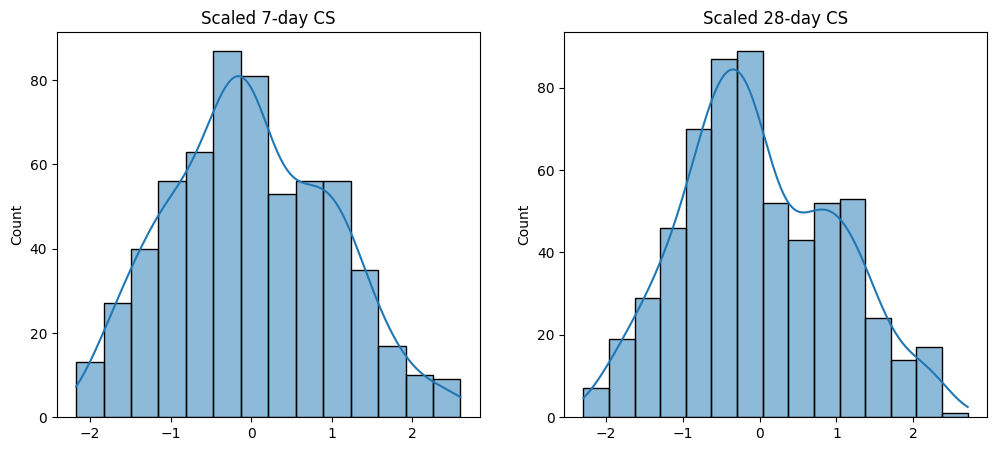

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets (assumes y_7 and y_28 are defined from your cleaned dataset)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Split the scaled targets into separate arrays
y_7_scaled = targets_scaled[:, 0]
y_28_scaled = targets_scaled[:, 1]

# Optional: Visualize the scaled target distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_7_scaled, kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(y_28_scaled, kde=True)
plt.title("Scaled 28-day CS")
plt.show()


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


Dataset size (scaled targets): 603


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Skip removal of the test points corresponding to the common worst-prediction indices.
# =============================================================================
# The common_indices removal step is omitted; we simply assign the test arrays.
X_test_clean = X_test
y7_test_clean = y7_test
y28_test_clean = y28_test

# =============================================================================
# Dataset Class - Modified for Paper Style (each sample treated as individual mix)
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the (unchanged) test arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
# CHANGE: Batch size = 1 for paper style (each mix processed individually)
# Add pin_memory and num_workers for faster GPU transfer
train_loader_full = DataLoader(train_dataset_full, batch_size=32, shuffle=True, 
                              pin_memory=True, num_workers=0)

# Create a DataLoader for the test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean),
                              pin_memory=True, num_workers=0)

print("Final Training dataset size:", len(train_dataset_full))
print("Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n{'='*60}")
print(f"DEVICE CONFIGURATION")
print(f"{'='*60}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
print(f"Using device: {device}")
print(f"{'='*60}\n")

# =============================================================================
# 1. Model Definition - Paper Style (Simpler, No BatchNorm/Dropout)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[50, 50], dropout_rate=0.0):  # CHANGE: Simpler architecture
        super(AGPModelGP_v2, self).__init__()
        # CHANGE: No BatchNorm, simpler architecture
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], 4)  # CHANGE: Only 4 outputs (θ1, θ2, θ3, θ4)
        self.softplus = nn.Softplus()
        
    def forward(self, x):
        # CHANGE: No BatchNorm or Dropout, simple forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = self.fc3(x)
        
        # CHANGE: Only 4 parameters, matching paper
        theta1 = self.softplus(out[:, 0])  # Positive slope
        theta2 = out[:, 1]                  # Intercept
        sigma_f = torch.exp(out[:, 2])     # Signal variance (θ3 in paper)
        l = torch.exp(out[:, 3])           # Length scale (θ4 in paper)
        
        # CHANGE: Fixed noise variance instead of learned
        sigma_n = torch.ones_like(theta1) * 0.01  # Small fixed noise
        
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function - Paper Style
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    # CHANGE: Process each sample individually (batch_size should be 1)
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    
    for i in range(batch_size):
        # Mean function: m(t) = θ1 * log(t) + θ2
        m = theta1[i] * log_t + theta2[i]
        
        # Covariance matrix with paper's formulation
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        
        # CHANGE: Minimal noise added to diagonal
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        
        # Cholesky decomposition for stable computation
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        
        # Negative log marginal likelihood
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
        
    return total_nll / batch_size

# =============================================================================
# 3. Prediction Function - Paper Style (No MC Dropout)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=1, epsilon=1e-6):  # CHANGE: num_samples=1
    print("\n" + "="*60)
    print("PREDICTION PROCESS - Paper Style (No MC Dropout)")
    print("="*60)
    print(f"Model Mode: {'eval' if not model.training else 'train'}")
    print(f"Number of MC samples: {num_samples} (Paper style uses 1)")
    print(f"Test samples: {len(dataloader.dataset)}")
    
    model.eval()  # CHANGE: eval mode (no dropout in paper's model)
    all_means = []
    all_vars = []
    
    # Track parameter statistics during prediction
    param_ranges = {
        'theta1': [], 'theta2': [], 'sigma_f': [], 'l': []
    }
    
    with torch.no_grad():  # CHANGE: No gradient needed for prediction
        for batch_idx, (z, _, y) in enumerate(dataloader):
            z = z.to(device)
            t_fixed_in = t.to(device)
            
            # Get GP parameters for each test sample
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            
            # Compute mean predictions
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            all_means.append(m.cpu().numpy())
            
            # Compute predictive variance (only aleatoric uncertainty)
            batch_vars = []
            for i in range(z.size(0)):
                # For prior variance (no training data conditioning)
                # Variance is just the diagonal of the kernel
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    # Prior variance at each time point
                    prior_var = sigma_f[i]**2 + sigma_n[i]**2
                    var_i.append(prior_var.item())
                batch_vars.append(var_i)
                
                # Collect parameter values
                param_ranges['theta1'].append(theta1[i].item())
                param_ranges['theta2'].append(theta2[i].item())
                param_ranges['sigma_f'].append(sigma_f[i].item())
                param_ranges['l'].append(l[i].item())
            
            all_vars.append(np.array(batch_vars))
            
            # Print progress for large test sets
            if (batch_idx + 1) % 50 == 0:
                print(f"  Processed {batch_idx + 1} batches...")
    
    pred_mean = np.concatenate(all_means, axis=0)
    pred_var = np.concatenate(all_vars, axis=0)
    
    # Print prediction statistics
    print(f"\nPrediction Statistics:")
    print(f"  Mean predictions - 7-day: [{np.min(pred_mean[:, 0]):.3f}, {np.max(pred_mean[:, 0]):.3f}]")
    print(f"  Mean predictions - 28-day: [{np.min(pred_mean[:, 1]):.3f}, {np.max(pred_mean[:, 1]):.3f}]")
    print(f"  Uncertainties - 7-day: [{np.min(np.sqrt(pred_var[:, 0])):.3f}, {np.max(np.sqrt(pred_var[:, 0])):.3f}]")
    print(f"  Uncertainties - 28-day: [{np.min(np.sqrt(pred_var[:, 1])):.3f}, {np.max(np.sqrt(pred_var[:, 1])):.3f}]")
    
    print(f"\nParameter Ranges on Test Set:")
    print(f"  θ1 (slope):     [{min(param_ranges['theta1']):.3f}, {max(param_ranges['theta1']):.3f}]")
    print(f"  θ2 (intercept): [{min(param_ranges['theta2']):.3f}, {max(param_ranges['theta2']):.3f}]")
    print(f"  σf (signal):    [{min(param_ranges['sigma_f']):.3f}, {max(param_ranges['sigma_f']):.3f}]")
    print(f"  l (length):     [{min(param_ranges['l']):.3f}, {max(param_ranges['l']):.3f}]")
    
    print("="*60 + "\n")
    
    # CHANGE: No epistemic uncertainty (no MC Dropout)
    return pred_mean, pred_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    
    # Move time points to GPU once
    t = t.to(device)
    
    # Print initial model state
    print("\n" + "="*60)
    print("TRAINING PROCESS - Paper Style AGP Model")
    print("="*60)
    print(f"Model Architecture: {model}")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")
    print(f"Batch Size: {train_loader.batch_size} (individual mix processing)")
    print(f"Learning Rate: {optimizer.param_groups[0]['lr']}")
    print(f"Training Samples: {len(train_loader.dataset)}")
    print(f"Device: {device}")
    if device.type == 'cuda':
        print(f"GPU Memory Allocated: {torch.cuda.memory_allocated() / 1e6:.2f} MB")
    print("="*60 + "\n")
    
    # Track losses for monitoring
    epoch_losses = []
    
    # For GPU timing
    if device.type == 'cuda':
        start_event = torch.cuda.Event(enable_timing=True)
        end_event = torch.cuda.Event(enable_timing=True)
    
    for epoch in range(num_epochs):
        total_loss = 0.0
        batch_losses = []
        
        # Track parameter statistics every 50 epochs
        if epoch % 50 == 0:
            param_stats = {}
        
        # Time the epoch on GPU
        if device.type == 'cuda':
            start_event.record()
        
        for batch_idx, (z, _, y) in enumerate(train_loader):
            z, y = z.to(device, non_blocking=True), y.to(device, non_blocking=True)
            optimizer.zero_grad()
            
            # Forward pass
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            
            # Compute loss
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            batch_loss = loss.item()
            total_loss += batch_loss
            batch_losses.append(batch_loss)
            
            # Print detailed info for first epoch and every 100th batch
            if epoch == 0 and batch_idx < 5:
                print(f"  Batch {batch_idx+1}: Loss = {batch_loss:.4f}")
                print(f"    θ1={theta1[0].item():.3f}, θ2={theta2[0].item():.3f}, σf={sigma_f[0].item():.3f}, l={l[0].item():.3f}")
            
            # Collect parameter statistics
            if epoch % 50 == 0:
                if batch_idx == 0:
                    param_stats['theta1'] = [theta1.item()]
                    param_stats['theta2'] = [theta2.item()]
                    param_stats['sigma_f'] = [sigma_f.item()]
                    param_stats['l'] = [l.item()]
                else:
                    param_stats['theta1'].append(theta1.item())
                    param_stats['theta2'].append(theta2.item())
                    param_stats['sigma_f'].append(sigma_f.item())
                    param_stats['l'].append(l.item())
        
        # Record epoch time on GPU
        if device.type == 'cuda':
            end_event.record()
            torch.cuda.synchronize()
            epoch_time = start_event.elapsed_time(end_event) / 1000.0  # Convert to seconds
        
        avg_loss = total_loss / len(train_loader)
        epoch_losses.append(avg_loss)
        
        # Print progress every 10 epochs initially, then every 50
        if (epoch + 1) <= 50 and (epoch + 1) % 10 == 0:
            time_info = f" ({epoch_time:.2f}s)" if device.type == 'cuda' else ""
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f} " +
                  f"(min batch: {min(batch_losses):.4f}, max batch: {max(batch_losses):.4f}){time_info}")
        elif (epoch + 1) % 50 == 0:
            time_info = f" (Time: {epoch_time:.2f}s)" if device.type == 'cuda' else ""
            print(f"\nEpoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}{time_info}")
            print(f"  Loss Statistics - Min: {min(batch_losses):.4f}, " +
                  f"Max: {max(batch_losses):.4f}, Std: {np.std(batch_losses):.4f}")
            
            # Print parameter statistics
            print(f"  Parameter Ranges:")
            print(f"    θ1 (slope):     [{min(param_stats['theta1']):.3f}, {max(param_stats['theta1']):.3f}] " +
                  f"(mean: {np.mean(param_stats['theta1']):.3f})")
            print(f"    θ2 (intercept): [{min(param_stats['theta2']):.3f}, {max(param_stats['theta2']):.3f}] " +
                  f"(mean: {np.mean(param_stats['theta2']):.3f})")
            print(f"    σf (signal):    [{min(param_stats['sigma_f']):.3f}, {max(param_stats['sigma_f']):.3f}] " +
                  f"(mean: {np.mean(param_stats['sigma_f']):.3f})")
            print(f"    l (length):     [{min(param_stats['l']):.3f}, {max(param_stats['l']):.3f}] " +
                  f"(mean: {np.mean(param_stats['l']):.3f})")
            
            if device.type == 'cuda':
                print(f"  GPU Memory: {torch.cuda.memory_allocated() / 1e6:.2f} MB allocated, " +
                      f"{torch.cuda.max_memory_allocated() / 1e6:.2f} MB peak")
            
            # Check convergence
            if epoch > 100:
                recent_losses = epoch_losses[-50:]
                loss_change = abs(recent_losses[-1] - recent_losses[0])
                print(f"  Loss change over last 50 epochs: {loss_change:.6f}")
                if loss_change < 0.001:
                    print("  → Model appears to be converging")
    
    print("\n" + "="*60)
    print("TRAINING COMPLETED")
    print(f"Final Average Loss: {epoch_losses[-1]:.4f}")
    print(f"Loss Reduction: {epoch_losses[0]:.4f} → {epoch_losses[-1]:.4f} " +
          f"({(1 - epoch_losses[-1]/epoch_losses[0])*100:.1f}% improvement)")
    if device.type == 'cuda':
        print(f"Total GPU Memory Used: {torch.cuda.max_memory_allocated() / 1e6:.2f} MB")
    print("="*60 + "\n")
    
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# CHANGE: Different hyperparameters for paper style
best_dropout = 0.0  # No dropout in paper style
best_lr = 0.001     # Potentially lower learning rate for simpler model
best_hidden_dims = [50, 50]  # Simpler architecture

print("\n" + "="*80)
print("PAPER-STYLE AGP MODEL IMPLEMENTATION")
print("="*80)
print("Key Differences from Original Model:")
print("  • Simpler architecture: [50, 50] hidden layers (vs [128, 64, 32])")
print("  • No BatchNorm or Dropout")
print("  • 4 learned parameters (vs 5)")
print("  • Fixed noise variance")
print("  • Individual mix processing (batch_size=1)")
print("  • No MC Dropout uncertainty")
print("="*80)

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

# Print model summary
total_params = sum(p.numel() for p in model_final.parameters() if p.requires_grad)
print(f"\nModel initialized with {total_params} trainable parameters")
print(f"Device: {device}")

# Clear GPU cache before training
if device.type == 'cuda':
    torch.cuda.empty_cache()
    print(f"GPU Memory before training: {torch.cuda.memory_allocated() / 1e6:.2f} MB")

print("\n--- Final Model Training (Paper Style) ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Clear cache before inference
if device.type == 'cuda':
    torch.cuda.empty_cache()

# Perform inference on the test set (no MC Dropout).
print("\n--- Inference on Test Set (Paper Style) ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=1)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty (Paper Style)")
plt.legend()
plt.show()

# =============================================================================
# Summary of Changes from Your Model to Paper Style:
# =============================================================================
print("\n" + "="*60)
print("KEY DIFFERENCES - Paper Style Implementation:")
print("="*60)
print("1. Architecture: Simpler MLP (50-50-4) vs complex (128-64-32-5)")
print("2. No BatchNorm layers")
print("3. No Dropout (0.0 dropout rate)")
print("4. Only 4 learned parameters (θ1, θ2, σf, l) vs 5")
print("5. Fixed noise variance vs learned σn")
print("6. Batch size = 1 (individual mix processing)")
print("7. No MC Dropout inference (num_samples=1)")
print("8. Model in eval() mode during prediction")
print("="*60)

Final Training dataset size: 482
Test dataset size: 121

DEVICE CONFIGURATION
PyTorch version: 2.1.2+cu118
CUDA available: True
CUDA version: 11.8
GPU device: NVIDIA GeForce RTX 4090
GPU memory: 25.28 GB
Using device: cuda


PAPER-STYLE AGP MODEL IMPLEMENTATION
Key Differences from Original Model:
  • Simpler architecture: [50, 50] hidden layers (vs [128, 64, 32])
  • No BatchNorm or Dropout
  • 4 learned parameters (vs 5)
  • Fixed noise variance
  • Individual mix processing (batch_size=1)
  • No MC Dropout uncertainty

Model initialized with 3904 trainable parameters
Device: cuda
GPU Memory before training: 17.30 MB

--- Final Model Training (Paper Style) ---

TRAINING PROCESS - Paper Style AGP Model
Model Architecture: AGPModelGP_v2(
  (fc1): Linear(in_features=22, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
  (softplus): Softplus(beta=1, threshold=20)
)
Total Parameters: 3904
Bat

RuntimeError: a Tensor with 32 elements cannot be converted to Scalar

In [174]:
# ----- Sensitivity Analysis for 7-day Prediction -----
# We analyze the effect on the 7-day prediction.

# Choose a small perturbation value (δ) in the scaled space.
delta = 0.01  # adjust this value if needed

# Get the number of test samples and number of features.
num_samples, num_features = X_test.shape

# Initialize an array to store the sensitivity for each test sample and feature.
sensitivities = np.zeros((num_samples, num_features))

# We focus on the 7-day prediction. Recall that our model predicts:
#   m = theta1 * log(t + epsilon) + theta2
# We'll use t = 7.0 for our sensitivity analysis.
t_val = 7.0
t_tensor = torch.tensor([t_val], dtype=torch.float32, device=device)

# Set the model to evaluation mode to disable dropout randomness.
model_final.eval()

# Loop over each test sample.
with torch.no_grad():
    for i in range(num_samples):
        # Get the i-th sample from the scaled test set (as a NumPy array).
        x = X_test[i]  # shape: (num_features,)
        
        # Convert the sample to a torch tensor and add a batch dimension.
        x_tensor = torch.tensor(x, dtype=torch.float32, device=device).unsqueeze(0)
        
        # Compute the baseline prediction for t=7.
        theta1, theta2, _, _, _ = model_final(x_tensor)
        baseline_pred = theta1.item() * torch.log(t_tensor + 1e-6).item() + theta2.item()
        
        # Now perturb each feature one by one.
        for j in range(num_features):
            # Create a copy of x and perturb the j-th feature.
            x_perturbed = x.copy()
            x_perturbed[j] += delta
            
            # Convert the perturbed sample to a tensor.
            x_perturbed_tensor = torch.tensor(x_perturbed, dtype=torch.float32, device=device).unsqueeze(0)
            
            # Compute the prediction for the perturbed sample.
            theta1_p, theta2_p, _, _, _ = model_final(x_perturbed_tensor)
            perturbed_pred = theta1_p.item() * torch.log(t_tensor + 1e-6).item() + theta2_p.item()
            
            # The sensitivity for feature j is the change in prediction divided by delta.
            sensitivities[i, j] = (perturbed_pred - baseline_pred) / delta

# Compute the average absolute sensitivity for each feature over all test samples.
mean_sensitivity = np.mean(np.abs(sensitivities), axis=0)

# Map each feature's average sensitivity to its corresponding name.
# Assume feature_cols is a list of feature names matching the columns in X_test.
sensitivity_dict = {feature_cols[j]: mean_sensitivity[j] for j in range(num_features)}

# Print the sensitivity results.
print("Average Sensitivity for each input feature (impact on 7-day prediction):")
for feature, sens in sensitivity_dict.items():
    print(f"{feature}: {sens:.4f}")

# Optionally, create a DataFrame to display the results.
import pandas as pd
df_sensitivity = pd.DataFrame({
    'Feature': feature_cols,
    'Average Sensitivity': mean_sensitivity
})
print("\nSensitivity Analysis Results:")
print(df_sensitivity.sort_values(by='Average Sensitivity', ascending=False))


Average Sensitivity for each input feature (impact on 7-day prediction):
SiO2: 0.2619
Al2O3: 0.3193
Fe2O3: 0.1484
CaO: 0.2489
MgO: 0.1336
Na2O: 0.0978
K2O: 0.1448
SO3: 0.1584
TiO2: 0.1320
P2O5: 0.1115
SrO: 0.0930
Mn2O3: 0.0815
LOI: 0.1256
AL/B: 0.2292
SH/SS: 0.3755
Ms: 0.1495
Ag/B: 0.2822
W/B: 0.2334
Sp/B: 0.1117
Initial curing temp (C): 0.4471
Final curing temp (C): 0.1210
Concentration (M) NaOH: 0.2305

Sensitivity Analysis Results:
                    Feature  Average Sensitivity
19  Initial curing temp (C)             0.447067
14                    SH/SS             0.375502
1                     Al2O3             0.319274
16                     Ag/B             0.282159
0                      SiO2             0.261916
3                       CaO             0.248943
17                      W/B             0.233385
21   Concentration (M) NaOH             0.230493
13                     AL/B             0.229249
7                       SO3             0.158379
15                    

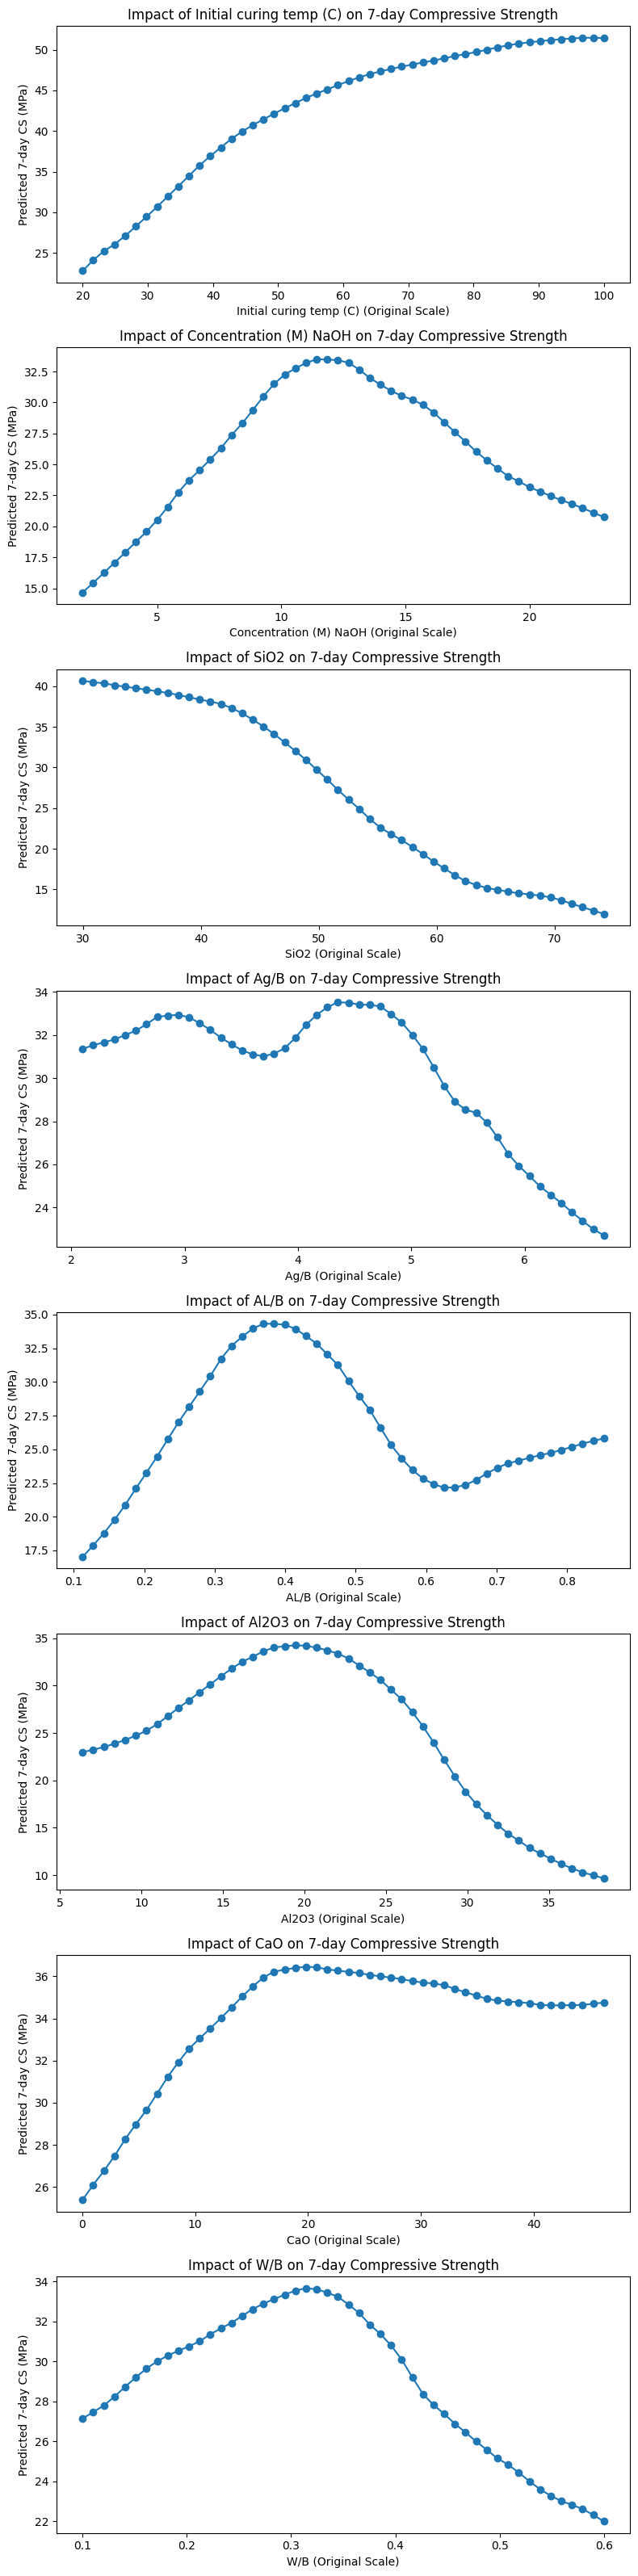

In [176]:
# =============================================================================
# 6. Sensitivity Analysis for 7-day Prediction
# =============================================================================
# We want to analyze the impact of varying specific input features on the 7-day prediction.
# Selected features (using original names) for this analysis:
selected_features = [
    "Initial curing temp (C)", "Concentration (M) NaOH", "SiO2", "Ag/B",
    "AL/B", "Al2O3", "CaO", "W/B"
]

# For sensitivity analysis, we need the original feature values.
# 'X' is defined earlier as the original feature array from df_clean.
# Use the median of X (original scale) as the baseline sample.
baseline_sample_orig = np.median(X, axis=0)  # shape: (num_features,)

# Create a mapping from feature name to index (as in feature_cols).
feature_to_idx = {feat: idx for idx, feat in enumerate(feature_cols)}

# Number of points to sample along the range of each feature.
num_points = 50

# Dictionary to store sensitivity results: keys are feature names, values are (x_values, predicted 7d CS)
sensitivity_results = {}

# Loop over each selected feature.
for feat in selected_features:
    idx = feature_to_idx[feat]
    # Obtain the range of original values for this feature (from all of X).
    feat_values = X[:, idx]
    feat_min, feat_max = np.min(feat_values), np.max(feat_values)
    x_range = np.linspace(feat_min, feat_max, num_points)
    
    preds = []
    for val in x_range:
        # Create a copy of the baseline sample and replace the value of the selected feature.
        sample_orig = baseline_sample_orig.copy()
        sample_orig[idx] = val
        # Scale the modified sample using the same feature scaler.
        sample_scaled = scaler.transform(sample_orig.reshape(1, -1))
        sample_tensor = torch.tensor(sample_scaled, dtype=torch.float32, device=device)
        
        # Set the prediction time to 7 days.
        t_tensor = torch.tensor([7.0], dtype=torch.float32, device=device)
        model_final.eval()
        with torch.no_grad():
            theta1, theta2, _, _, _ = model_final(sample_tensor)
            pred_scaled = theta1.item() * torch.log(t_tensor + 1e-6).item() + theta2.item()
        # Inverse transform the scaled prediction to original target units.
        # We use a dummy 2-column array for inverse_transform (only the first column matters).
        pred_original = target_scaler.inverse_transform([[pred_scaled, 0]])[0, 0]
        preds.append(pred_original)
    
    sensitivity_results[feat] = (x_range, preds)

# Plot sensitivity curves for each selected feature.
num_selected = len(selected_features)
fig, axes = plt.subplots(nrows=num_selected, ncols=1, figsize=(8, 4*num_selected), sharex=False)
for i, feat in enumerate(selected_features):
    ax = axes[i] if num_selected > 1 else axes
    x_vals, y_preds = sensitivity_results[feat]
    ax.plot(x_vals, y_preds, marker='o', linestyle='-')
    ax.set_xlabel(feat + " (Original Scale)")
    ax.set_ylabel("Predicted 7-day CS (MPa)")
    ax.set_title(f"Impact of {feat} on 7-day Compressive Strength")
plt.tight_layout()
plt.show()

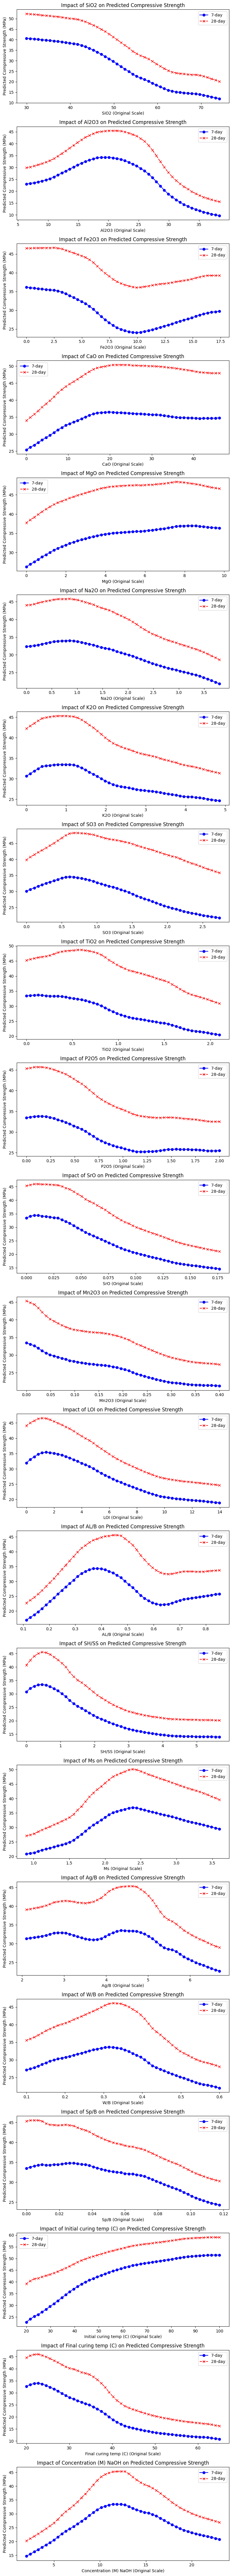

In [178]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ================================
# 6. Sensitivity Analysis for 7-day and 28-day Predictions
# ================================

# Selected features for sensitivity analysis (using original names):
selected_features = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Use the median of the original feature data as the baseline sample.
baseline_sample_orig = np.median(X, axis=0)  # shape: (num_features,)

# Create a mapping from feature names to their column indices.
feature_to_idx = {feat: idx for idx, feat in enumerate(feature_cols)}

# Number of points to sample along the range for each feature.
num_points = 50

# Dictionaries to store sensitivity results for each selected feature.
# Each entry will contain: x_range (original values) and two arrays of predictions (for 7d and 28d).
sensitivity_results = {}

# We will compute predictions for t = 7 and t = 28 days.
t7 = 7.0
t28 = 28.0
epsilon_val = 1e-6  # to avoid log(0)

# Set model to evaluation mode (no dropout randomness) for sensitivity analysis.
model_final.eval()

for feat in selected_features:
    idx = feature_to_idx[feat]
    
    # Get the range of original values for this feature from the training data.
    feat_values = X[:, idx]
    feat_min, feat_max = np.min(feat_values), np.max(feat_values)
    x_range = np.linspace(feat_min, feat_max, num_points)
    
    preds_7d = []   # predicted 7-day compressive strength (in original units)
    preds_28d = []  # predicted 28-day compressive strength (in original units)
    
    # Loop over the range of values for this feature.
    for val in x_range:
        # Create a copy of the baseline sample.
        sample_orig = baseline_sample_orig.copy()
        # Replace the value of the selected feature with the perturbed value.
        sample_orig[idx] = val
        
        # Scale the sample using the fitted feature scaler.
        sample_scaled = scaler.transform(sample_orig.reshape(1, -1))
        sample_tensor = torch.tensor(sample_scaled, dtype=torch.float32, device=device)
        
        # For t = 7 days:
        t_tensor_7 = torch.tensor([t7], dtype=torch.float32, device=device)
        with torch.no_grad():
            theta1, theta2, _, _, _ = model_final(sample_tensor)
            # Compute the scaled prediction using the model's equation:
            # pred_scaled = theta1 * log(t + epsilon) + theta2
            pred7_scaled = theta1.item() * np.log(t7 + epsilon_val) + theta2.item()
        
        # For t = 28 days:
        t_tensor_28 = torch.tensor([t28], dtype=torch.float32, device=device)
        with torch.no_grad():
            theta1, theta2, _, _, _ = model_final(sample_tensor)
            pred28_scaled = theta1.item() * np.log(t28 + epsilon_val) + theta2.item()
        
        # Since target_scaler is a StandardScaler, its inverse is linear.
        # Thus, for the 7-day column (column 0):
        pred7_original = pred7_scaled * target_scaler.scale_[0] + target_scaler.mean_[0]
        # And for the 28-day column (column 1):
        pred28_original = pred28_scaled * target_scaler.scale_[1] + target_scaler.mean_[1]
        
        preds_7d.append(pred7_original)
        preds_28d.append(pred28_original)
    
    sensitivity_results[feat] = (x_range, np.array(preds_7d), np.array(preds_28d))

# ================================
# Plotting the Sensitivity Curves
# ================================
num_selected = len(selected_features)
fig, axes = plt.subplots(nrows=num_selected, ncols=1, figsize=(8, 4*num_selected), sharex=False)

for i, feat in enumerate(selected_features):
    ax = axes[i] if num_selected > 1 else axes
    x_vals, y_preds_7, y_preds_28 = sensitivity_results[feat]
    
    ax.plot(x_vals, y_preds_7, marker='o', linestyle='-', color='blue', label='7-day')
    ax.plot(x_vals, y_preds_28, marker='x', linestyle='--', color='red', label='28-day')
    ax.set_xlabel(f"{feat} (Original Scale)")
    ax.set_ylabel("Predicted Compressive Strength (MPa)")
    ax.set_title(f"Impact of {feat} on Predicted Compressive Strength")
    ax.legend()

plt.tight_layout()
plt.show()


Original test DataFrame:
     Idx_Sample   Ref.                                   Mixture Code in Ref  \
409         418   [26]                                                    M3   
1449       1591   [99]  FA-70 GGBS- 30 B-360 AGG/B-4.84 ALK/B-0.55 T ºC - 60   
1489       1634  [101]                                                   G31   
342         363   [20]                                                    S3   
702         742   [49]                                         D.M16-350-1:3   
817         857   [62]                                                Mix 11   
139         142    [6]                                             AAS5-1.00   
1358       1391   [98]                                                   B15   
343         364   [20]                                                    S4   
935         977   [72]                   SiO3/OH = 1.5 100ºC AL/GGBFS = 0.35   
232         243   [16]                                                   NaN   
504         513

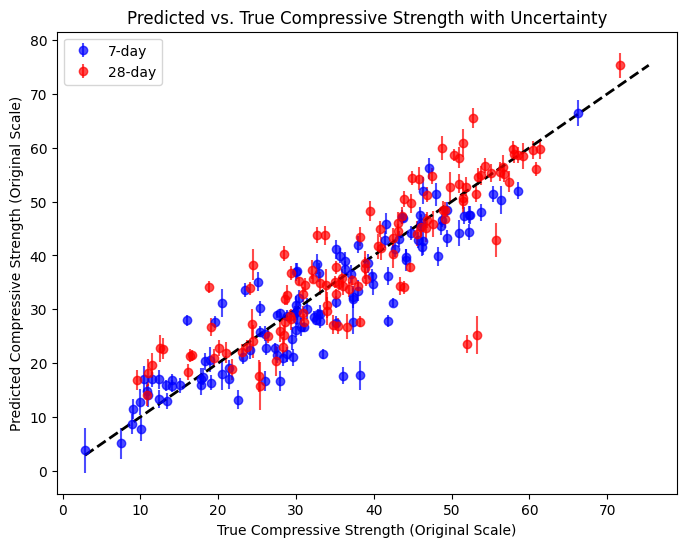

In [149]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------------------------------------------------------
# 0. Data Preparation for Final Training and Testing
# ---------------------------------------------------------------------------
# Assume X_scaled, y_7_scaled, y_28_scaled, and df_clean (the original, cleaned DataFrame)
# are available from your previous data preparation.

# Create an index array so we can later extract the corresponding rows from df_clean.
indices = np.arange(len(X_scaled))

# Split: 80% for training and 20% for testing, while keeping track of indices.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test, idx_train, idx_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, indices, test_size=0.2, random_state=42)

# For testing, we do not remove any data points.
X_test_clean = X_test
y7_test_clean = y7_test
y28_test_clean = y28_test

# Extract the original (unscaled) test set from df_clean using the indices.
df_test = df_clean.iloc[idx_test]
print("Original test DataFrame:")
print(df_test)

# ---------------------------------------------------------------------------
# Dataset Class
# ---------------------------------------------------------------------------
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create datasets and loaders.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---------------------------------------------------------------------------
# 1. Model Definition (Same as before)
# ---------------------------------------------------------------------------
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# ---------------------------------------------------------------------------
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# ---------------------------------------------------------------------------
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# ---------------------------------------------------------------------------
# 3. MC Dropout Inference Function for Testing
# ---------------------------------------------------------------------------
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# ---------------------------------------------------------------------------
# 4. Define a Simple Training Loop Function (train_gp_model)
# ---------------------------------------------------------------------------
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# ---------------------------------------------------------------------------
# 5. Final Training and Testing on the Held-out Test Set
# ---------------------------------------------------------------------------
# Best hyperparameters from tuning (example values).
best_dropout = 0.05
best_lr = 0.002
best_hidden_dims = [128, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the test set.
print("\n--- MC Dropout Inference on Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [151]:
# -----------------------------------------------------------------------------
# 6. Extrapolate and Predict 3-day Strength on the Test Set
# -----------------------------------------------------------------------------
# Define a new time tensor for day 3.
t_day3 = torch.tensor([3.0], dtype=torch.float32)

print("\n--- MC Dropout Inference on Test Set for 3-day (Extrapolation) ---")
mc_mean_3, mc_var_3 = mc_predict_with_uncertainty(model_final, test_loader_clean, t_day3, num_samples=50)
# mc_mean_3 will have shape (num_test, 1)

# Note: target_scaler was originally fitted on [7d, 28d] targets.
# If you have a dedicated scaler for 3-day strength, use that instead.
# Here, for demonstration, we use the day-7 scaling parameters.
# Construct a dummy 2-column array where the first column is our day-3 prediction.
dummy_for_inverse = np.hstack([mc_mean_3, np.zeros((mc_mean_3.shape[0], 1))])
y_pred_3_original_full = target_scaler.inverse_transform(dummy_for_inverse)
# Use the first column as the 3-day predictions.
y_pred_3_original = y_pred_3_original_full[:, 0]

# Convert variance: assume the scaling factor for day 7 applies for day 3.
var_3_original = mc_var_3[:, 0] * (std_scale[0]**2)
std_3_original = np.sqrt(var_3_original)

print("\nPredicted 3-day compressive strength (first 10 examples):")
print(y_pred_3_original[:10])
print("\nPredicted std dev for 3-day compressive strength (first 10 examples):")
print(std_3_original[:10])

# -----------------------------------------------------------------------------
# Match Predictions with df_test
# -----------------------------------------------------------------------------
# Add the predicted 3-day compressive strengths to df_test as a new column.
df_test_with_pred = df_test.copy()
df_test_with_pred['Predicted 3d CS'] = y_pred_3_original

print("\nTest DataFrame with Predicted 3-day Compressive Strength:")
print(df_test_with_pred)



--- MC Dropout Inference on Test Set for 3-day (Extrapolation) ---

Predicted 3-day compressive strength (first 10 examples):
[48.34817228 36.59138969 49.47380942 41.69482229 27.36459297 15.85602832
 21.13952718 15.92187155 42.76160254 28.67366719]

Predicted std dev for 3-day compressive strength (first 10 examples):
[1.39698501 1.70421746 2.08645383 1.51814236 1.23238894 0.92470751
 1.46756784 1.96330301 1.50585409 0.98304574]

Test DataFrame with Predicted 3-day Compressive Strength:
     Idx_Sample   Ref.                                   Mixture Code in Ref  \
409         418   [26]                                                    M3   
1449       1591   [99]  FA-70 GGBS- 30 B-360 AGG/B-4.84 ALK/B-0.55 T ºC - 60   
1489       1634  [101]                                                   G31   
342         363   [20]                                                    S3   
702         742   [49]                                         D.M16-350-1:3   
817         857   [62]     

In [152]:
print(df_test_with_pred[['3-d Cubic compressive strength (MPa)', 'Predicted 3d CS']])


      3-d Cubic compressive strength (MPa)  Predicted 3d CS
409                                    NaN        48.348172
1449                               27.9400        36.591390
1489                                   NaN        49.473809
342                                45.2800        41.694822
702                                29.4000        27.364593
817                                    NaN        15.856028
139                                    NaN        21.139527
1358                                   NaN        15.921872
343                                48.5200        42.761603
935                                23.4400        28.673667
232                                    NaN        38.329652
504                                    NaN        17.052115
408                                    NaN        47.471952
1591                                0.0000        -0.291080
970                                19.2400        17.566893
758                                    N

In [153]:
from sklearn.metrics import mean_absolute_error

# Drop rows where the actual 3-day strength is NaN
df_mae = df_test_with_pred[['3-d Cubic compressive strength (MPa)', 'Predicted 3d CS']].dropna()

# Compute MAE
mae_3d = mean_absolute_error(df_mae['3-d Cubic compressive strength (MPa)'], df_mae['Predicted 3d CS'])

print(f"\nMAE for 3-day compressive strength prediction: {mae_3d:.4f} MPa")



MAE for 3-day compressive strength prediction: 5.1009 MPa


In [154]:
# -----------------------------------------------------------------------------
# 6. Extrapolate and Predict 3-day Strength on the Test Set (in scaled space)
# -----------------------------------------------------------------------------
# Define a new time tensor for day 3.
t_day3 = torch.tensor([3.0], dtype=torch.float32)

print("\n--- MC Dropout Inference on Test Set for 3-day (Extrapolation, Scaled) ---")
mc_mean_3, mc_var_3 = mc_predict_with_uncertainty(model_final, test_loader_clean, t_day3, num_samples=50)
# mc_mean_3 will have shape (num_test, 1)

# In this approach, we do not perform an inverse transform.
# Our predicted day3 values remain in the scaled space.
y_pred_3_scaled = mc_mean_3.squeeze()  # shape: (num_test,)

# -----------------------------------------------------------------------------
# Prepare Ground Truth in Scaled Space
# -----------------------------------------------------------------------------
# Assume df_test has a column "3-d Cubic compressive strength (MPa)" with the raw values.
# We will use the same scaling parameters as the 7-day targets (from target_scaler) for demonstration.
# (target_scaler.mean_[0] and target_scaler.scale_[0] are used for day7; this is an approximation for day3.)

y3_true = df_test["3-d Cubic compressive strength (MPa)"].values.astype(np.float32)
y3_true_scaled = (y3_true - target_scaler.mean_[0]) / target_scaler.scale_[0]

# -----------------------------------------------------------------------------
# Compute MAE in Scaled Space (ignoring NaN)
# -----------------------------------------------------------------------------
from sklearn.metrics import mean_absolute_error

# Create a DataFrame with the scaled ground truth and predictions and drop rows with NaN.
df_scaled = pd.DataFrame({
    "3d CS (scaled)": y3_true_scaled,
    "Predicted 3d CS (scaled)": y_pred_3_scaled
})
df_scaled = df_scaled.dropna()

mae_3d_scaled = mean_absolute_error(df_scaled["3d CS (scaled)"], df_scaled["Predicted 3d CS (scaled)"])
print(f"\nMAE (scaled) for 3-day compressive strength prediction: {mae_3d_scaled:.4f}")

# -----------------------------------------------------------------------------
# Match Predictions with df_test and Print Selected Columns
# -----------------------------------------------------------------------------
# Add the scaled predicted values and scaled ground truth as new columns.
df_test_with_pred = df_test.copy()
df_test_with_pred['Predicted 3d CS (scaled)'] = y_pred_3_scaled
df_test_with_pred['3d CS (scaled)'] = y3_true_scaled

# Print only the two columns.
print("\nScaled Ground Truth vs. Predicted 3-day Compressive Strength:")
print(df_test_with_pred[['3d CS (scaled)', 'Predicted 3d CS (scaled)']])



--- MC Dropout Inference on Test Set for 3-day (Extrapolation, Scaled) ---

MAE (scaled) for 3-day compressive strength prediction: 0.3830

Scaled Ground Truth vs. Predicted 3-day Compressive Strength:
      3d CS (scaled)  Predicted 3d CS (scaled)
409              NaN                  1.189261
1449       -0.325981                  0.301431
1489             NaN                  1.281302
342         0.953831                  0.687112
702        -0.218223                 -0.358064
817              NaN                 -1.186849
139              NaN                 -0.869276
1358             NaN                 -1.208061
343         1.192966                  0.815093
935        -0.658112                 -0.269866
232              NaN                  0.430486
504              NaN                 -1.080917
408              NaN                  1.110483
1591       -2.388146                 -2.457945
970        -0.968101                 -1.079235
758              NaN                 -0.09547

In [158]:
from sklearn.preprocessing import StandardScaler

# Use DataFrame instead of .values for fitting
non_nan_3d_df = df.loc[df["3-d Cubic compressive strength (MPa)"].notna(), ["3-d Cubic compressive strength (MPa)"]]

# Fit with feature names
scaler_3d = StandardScaler()
scaler_3d.fit(non_nan_3d_df)

# Now transform using DataFrame (no warning)
df.loc[non_nan_mask, "3d_CS_scaled"] = scaler_3d.transform(non_nan_3d_df)


In [168]:
# -----------------------------------------------------------------------------
# 6. Extrapolate and Predict 3-day Strength on the Test Set (in scaled space)
# -----------------------------------------------------------------------------
# Define a new time tensor for day 3.
t_day3 = torch.tensor([3.0], dtype=torch.float32)

print("\n--- MC Dropout Inference on Test Set for 3-day (Extrapolation, Scaled) ---")
mc_mean_3, mc_var_3 = mc_predict_with_uncertainty(model_final, test_loader_clean, t_day3, num_samples=50)
# mc_mean_3 will have shape (num_test, 1)

# Our predicted day-3 values remain in the scaled space.
y_pred_3_scaled = mc_mean_3.squeeze()  # shape: (num_test,)

# -----------------------------------------------------------------------------
# Prepare Ground Truth in Scaled Space using the dedicated 3d scaler
# -----------------------------------------------------------------------------
# For the test set, extract the ground truth 3-day values (non-NaN rows).
df_test_nonan = df_test.loc[df_test["3-d Cubic compressive strength (MPa)"].notna(), 
                            ["3-d Cubic compressive strength (MPa)"]]

# Scale the ground truth using scaler_3d
y3_true_scaled = scaler_3d.transform(df_test_nonan)[:, 0]

# Get a boolean mask for rows with non-NaN 3-day ground truth.
non_nan_idx = df_test["3-d Cubic compressive strength (MPa)"].notna().values
# Align predicted values to these rows.
y_pred_3_scaled_nonan = y_pred_3_scaled[non_nan_idx]

# -----------------------------------------------------------------------------
# Reverse (Inverse Transform) the Scaled Predictions to Original Space
# -----------------------------------------------------------------------------
# Initialize an array for the original predictions with NaNs.
y_pred_3_original = np.full_like(y_pred_3_scaled, np.nan)
# Inverse transform only the non-NaN rows.
y_pred_3_original[non_nan_idx] = scaler_3d.inverse_transform(
    y_pred_3_scaled_nonan.reshape(-1, 1)
).squeeze()

# -----------------------------------------------------------------------------
# Compute MAE in Original Space (ignoring NaN)
# -----------------------------------------------------------------------------
from sklearn.metrics import mean_absolute_error

# Extract ground truth original values for non-NaN rows.
y3_true_original = df_test.loc[non_nan_idx, "3-d Cubic compressive strength (MPa)"].values.astype(np.float32)
mae_3d_original = mean_absolute_error(y3_true_original, y_pred_3_original[non_nan_idx])
print(f"\nMAE for 3-day compressive strength prediction (original scale): {mae_3d_original:.4f} MPa")

# -----------------------------------------------------------------------------
# Match Predictions with df_test and Print Selected Columns (Original Scale)
# -----------------------------------------------------------------------------
df_test_with_pred = df_test.copy()
# Add inverse-transformed predictions.
df_test_with_pred['Predicted 3d CS (original)'] = np.nan
df_test_with_pred.loc[non_nan_idx, 'Predicted 3d CS (original)'] = y_pred_3_original[non_nan_idx]

# Also include the original 3-day ground truth.
df_test_with_pred['3d CS (original)'] = df_test["3-d Cubic compressive strength (MPa)"]

print("\nOriginal Ground Truth vs. Predicted 3-day Compressive Strength:")
print(df_test_with_pred[['3d CS (original)', 'Predicted 3d CS (original)']])



--- MC Dropout Inference on Test Set for 3-day (Extrapolation, Scaled) ---

MAE for 3-day compressive strength prediction (original scale): 7.5287 MPa

Original Ground Truth vs. Predicted 3-day Compressive Strength:
      3d CS (original)  Predicted 3d CS (original)
409                NaN                         NaN
1449           27.9400                   42.033241
1489               NaN                         NaN
342            45.2800                   46.964928
702            29.4000                   31.688433
817                NaN                         NaN
139                NaN                         NaN
1358               NaN                         NaN
343            48.5200                   48.310074
935            23.4400                   32.849236
232                NaN                         NaN
504                NaN                         NaN
408                NaN                         NaN
1591            0.0000                    1.359653
970            19.

In [172]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Extract ground truth original values for non-NaN rows.
y3_true_original = df_test.loc[non_nan_idx, "3-d Cubic compressive strength (MPa)"].values.astype(np.float32)
y_pred_3_original_nonan = y_pred_3_original[non_nan_idx]

# Compute MAE and R²
mae_3d_original = mean_absolute_error(y3_true_original, y_pred_3_original_nonan)
r2_3d_original = r2_score(y3_true_original, y_pred_3_original_nonan)
rmse_3d_original = root_mean_squared_error(y3_true_original, y_pred_3_original_nonan)

print(f"\nMAE for 3-day compressive strength prediction (original scale): {mae_3d_original:.4f} MPa")
print(f"R² for 3-day compressive strength prediction (original scale): {r2_3d_original:.4f}")
print(f"rmse for 3-day compressive strength prediction (original scale): {rmse_3d_original:.4f}")


MAE for 3-day compressive strength prediction (original scale): 7.5287 MPa
R² for 3-day compressive strength prediction (original scale): 0.5538
rmse for 3-day compressive strength prediction (original scale): 9.4971


In [171]:
import numpy as np
from sklearn.metrics import r2_score
import copy

# First, compute the baseline performance using the test set.
model_final.eval()
mc_mean, _ = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)
y_pred_original = target_scaler.inverse_transform(mc_mean)
_, _, y_test_clean_tensor = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean_tensor.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

baseline_r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
baseline_r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Baseline R² 7-day:", baseline_r2_7)
print("Baseline R² 28-day:", baseline_r2_28)

# List of feature names (should match the columns in X_scaled used in training)
feature_names = ["SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
                 "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
                 "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
                 "Initial curing temp (C)", "Final curing temp (C)", 
                 "Concentration (M) NaOH"]

# Initialize dictionaries to store importance values.
# We define importance as the drop in R² when a feature is permuted.
importance_7 = {}
importance_28 = {}

# Create a copy of the original X_test_clean to use for permutation.
X_test_orig = copy.deepcopy(X_test_clean)

# For each feature, permute its values and re-calculate R².
n_repeats = 5  # Optionally, average over several random shuffles for stability.
for i, feat in enumerate(feature_names):
    r2_7_list = []
    r2_28_list = []
    for _ in range(n_repeats):
        X_test_permuted = copy.deepcopy(X_test_orig)
        np.random.shuffle(X_test_permuted[:, i])  # Permute values in column i

        # Create a new dataset and DataLoader using the permuted features.
        permuted_dataset = ConcreteDatasetScaled(X_test_permuted, y7_test_clean, y28_test_clean)
        permuted_loader = DataLoader(permuted_dataset, batch_size=len(permuted_dataset))
        
        # Get model predictions on the permuted dataset.
        mc_mean_perm, _ = mc_predict_with_uncertainty(model_final, permuted_loader, t_fixed, num_samples=50)
        y_pred_perm = target_scaler.inverse_transform(mc_mean_perm)
        
        # Compute R² scores.
        _, _, y_perm_tensor = next(iter(permuted_loader))
        y_perm_np = y_perm_tensor.numpy()
        y_true_perm = target_scaler.inverse_transform(y_perm_np)
        
        r2_7_perm = r2_score(y_true_perm[:, 0], y_pred_perm[:, 0])
        r2_28_perm = r2_score(y_true_perm[:, 1], y_pred_perm[:, 1])
        
        r2_7_list.append(r2_7_perm)
        r2_28_list.append(r2_28_perm)
    
    # Average the performance over several shuffles.
    avg_r2_7 = np.mean(r2_7_list)
    avg_r2_28 = np.mean(r2_28_list)
    
    # Compute importance as the drop in performance compared to the baseline.
    importance_7[feat] = baseline_r2_7 - avg_r2_7
    importance_28[feat] = baseline_r2_28 - avg_r2_28

# Print the feature importance for each target.
print("\nFeature Importance for 7-day compressive strength (R² drop):")
for feat, imp in importance_7.items():
    print(f"{feat}: {imp:.4f}")

print("\nFeature Importance for 28-day compressive strength (R² drop):")
for feat, imp in importance_28.items():
    print(f"{feat}: {imp:.4f}")


Baseline R² 7-day: 0.8150424957275391
Baseline R² 28-day: 0.7542425394058228

Feature Importance for 7-day compressive strength (R² drop):
SiO2: 0.2563
Al2O3: 0.1855
Fe2O3: 0.1006
CaO: 0.1220
MgO: 0.0298
Na2O: 0.0363
K2O: 0.0488
SO3: 0.0640
TiO2: 0.0386
P2O5: 0.0208
SrO: 0.0280
Mn2O3: 0.0513
LOI: 0.0329
AL/B: 0.1700
SH/SS: 0.1067
Ms: 0.0800
Ag/B: 0.1773
W/B: 0.1322
Sp/B: 0.0623
Initial curing temp (C): 0.6100
Final curing temp (C): 0.0254
Concentration (M) NaOH: 0.3722

Feature Importance for 28-day compressive strength (R² drop):
SiO2: 0.3285
Al2O3: 0.2261
Fe2O3: 0.1326
CaO: 0.1645
MgO: 0.0301
Na2O: 0.0324
K2O: 0.0370
SO3: 0.0635
TiO2: 0.0336
P2O5: 0.0104
SrO: 0.0263
Mn2O3: 0.0617
LOI: 0.0371
AL/B: 0.1365
SH/SS: 0.1125
Ms: 0.1085
Ag/B: 0.1651
W/B: 0.1712
Sp/B: 0.0312
Initial curing temp (C): 0.3674
Final curing temp (C): 0.0205
Concentration (M) NaOH: 0.4623


In [8]:
print("\nFeature Importance for 7-day compressive strength (R² drop) sorted high-to-low:")
for feat, imp in sorted(importance_7.items(), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")

print("\nFeature Importance for 28-day compressive strength (R² drop) sorted high-to-low:")
for feat, imp in sorted(importance_28.items(), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")


Feature Importance for 7-day compressive strength (R² drop) sorted high-to-low:
Initial curing temp (C): 0.6671
Concentration (M) NaOH: 0.2950
SiO2: 0.2620
Ag/B: 0.1656
AL/B: 0.1581
Al2O3: 0.1562
CaO: 0.1351
W/B: 0.1276
Fe2O3: 0.1154
SH/SS: 0.0950
Ms: 0.0925
K2O: 0.0704
Sp/B: 0.0500
SO3: 0.0386
P2O5: 0.0379
Mn2O3: 0.0369
LOI: 0.0351
TiO2: 0.0340
Na2O: 0.0330
SrO: 0.0291
Final curing temp (C): 0.0259
MgO: 0.0245

Feature Importance for 28-day compressive strength (R² drop) sorted high-to-low:
Initial curing temp (C): 0.4671
Concentration (M) NaOH: 0.3669
SiO2: 0.3008
Al2O3: 0.1934
CaO: 0.1927
Fe2O3: 0.1570
W/B: 0.1435
AL/B: 0.1435
Ag/B: 0.1298
SH/SS: 0.1081
Ms: 0.0968
K2O: 0.0486
Mn2O3: 0.0463
SrO: 0.0375
Final curing temp (C): 0.0341
Sp/B: 0.0335
SO3: 0.0301
LOI: 0.0289
Na2O: 0.0225
MgO: 0.0219
P2O5: 0.0167
TiO2: 0.0160


In [11]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 56, Combined Error: 31.5562, z-score: 4.9007
Original Features: [ 5.0031166e+01  1.0016852e+01  2.0902030e+00  2.3806852e+01
  5.0443654e+00 -1.2785485e-08 -3.4637246e-08  1.4319066e-08
  1.2947667e-09 -7.6973272e-09  6.5961521e-11  1.0238435e-09
  3.9968019e+00  4.0101522e-01  3.9823008e-01  2.0000000e+00
  4.6999998e+00  4.0000001e-01  1.5000000e-02  6.0000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 52, Combined Error: 25.6173, z-score: 3.7197
Original Features: [ 5.2750000e+01  1.9969999e+01  2.2849998e+00  2.0565001e+01
  1.0249999e+00  4.7000000e-01  8.8499999e-01  2.0000000e-01
  5.4500002e-01 -7.6973272e-09  6.5961521e-11  1.0238435e-09
  1.4300001e+00  1.9175258e-01  5.0000000e-01  2.2000000e+00
  4.5000000e+00  9.9999994e-02 -5.3896970e-10  2.5000000e+01
  2.4000000e+01  2.9999993e+00]

Index: 11, Combined Error: 20.1167, z-score: 2.6259
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.39462

In [166]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and target_scaler are available.
# =============================================================================

# =============================================================================
# Dataset Class (Same as before)
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the full dataset.
full_dataset = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)

# =============================================================================
# Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# MC Dropout Inference Function for Testing (Same as before)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# Training Loop Function (Same as before)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=500):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# Cross Validation Setup
# =============================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Hyperparameters (example values from your tuning)
best_dropout = 0.05
best_lr = 0.002
best_hidden_dims = [128, 128, 64]
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f"\n=== Fold {fold+1}/{n_splits} ===")
    
    # Create DataLoader for training and validation subsets.
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)
    train_loader = DataLoader(train_subset, batch_size=len(train_subset), shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=len(val_subset), shuffle=False)
    
    # Initialize a fresh model and optimizer for each fold.
    model = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=best_lr)
    
    # Train the model on the training fold.
    model = train_gp_model(model, train_loader, t_fixed, optimizer, num_epochs=500)
    
    # Evaluate using MC Dropout inference on the validation fold.
    mc_mean, mc_var = mc_predict_with_uncertainty(model, val_loader, t_fixed, num_samples=50)
    
    # Convert predictions and ground truth from scaled to original space.
    y_pred_original = target_scaler.inverse_transform(mc_mean)
    _, _, y_val = next(iter(val_loader))
    y_val_np = y_val.numpy()
    y_true_original = target_scaler.inverse_transform(y_val_np)
    
    # Calculate R² metrics.
    r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
    r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
    print(f"Fold {fold+1} - R² 7-day: {r2_7:.4f}, R² 28-day: {r2_28:.4f}")
    
    fold_metrics.append((r2_7, r2_28))

# Compute average R² scores over all folds.
avg_r2_7 = np.mean([m[0] for m in fold_metrics])
avg_r2_28 = np.mean([m[1] for m in fold_metrics])
print(f"\n=== Average CV Metrics ===")
print(f"Average R² for 7-day compressive strength: {avg_r2_7:.4f}")
print(f"Average R² for 28-day compressive strength: {avg_r2_28:.4f}")



=== Fold 1/10 ===
Epoch 50/500, Training NLL Loss: 0.9428
Epoch 100/500, Training NLL Loss: 0.5359
Epoch 150/500, Training NLL Loss: 0.3626
Epoch 200/500, Training NLL Loss: 0.1237
Epoch 250/500, Training NLL Loss: 0.0209
Epoch 300/500, Training NLL Loss: -0.0131
Epoch 350/500, Training NLL Loss: -0.0814
Epoch 400/500, Training NLL Loss: -0.1019
Epoch 450/500, Training NLL Loss: -0.2182
Epoch 500/500, Training NLL Loss: -0.2455
Fold 1 - R² 7-day: 0.7513, R² 28-day: 0.5991

=== Fold 2/10 ===
Epoch 50/500, Training NLL Loss: 1.0262
Epoch 100/500, Training NLL Loss: 0.6060
Epoch 150/500, Training NLL Loss: 0.3660
Epoch 200/500, Training NLL Loss: 0.1203
Epoch 250/500, Training NLL Loss: 0.0683
Epoch 300/500, Training NLL Loss: -0.0365
Epoch 350/500, Training NLL Loss: -0.0412
Epoch 400/500, Training NLL Loss: -0.0569
Epoch 450/500, Training NLL Loss: -0.1811
Epoch 500/500, Training NLL Loss: -0.1297
Fold 2 - R² 7-day: 0.8610, R² 28-day: 0.8486

=== Fold 3/10 ===
Epoch 50/500, Training NL

In [11]:
import os
if os.path.exists("scaler.pkl"):
    print("Scaler 已保存。")
else:
    print("Scaler 保存文件不存在。")


Scaler 保存文件不存在。


R² score on new 3-day data: 0.2522860283912747


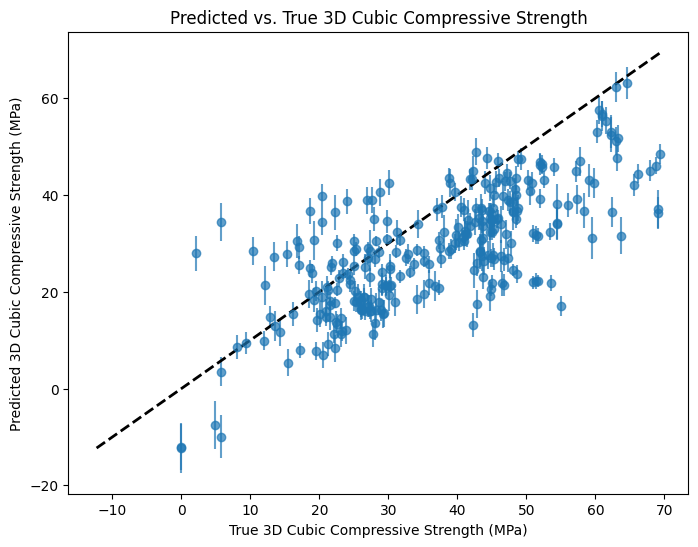

In [13]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
# Read the new CSV file
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')

# Keep rows where "3-d Cubic compressive strength (MPa)" is not missing
df_new = df_new[df_new["3-d Cubic compressive strength (MPa)"].notna()]

# Define the same feature columns as used during training
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Fill missing values for specific features with the median
df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

# Extract features and target
X_new = df_new[feature_cols].values
y_new = df_new["3-d Cubic compressive strength (MPa)"].values.reshape(-1, 1)

# Scale the features using the previously trained scaler (assumed to be in memory)
X_new_scaled = scaler.transform(X_new)

# We do NOT scale the new target data since our trained target_scaler is for 7d/28d targets.
# Instead, we use the original y_new values for evaluation.

# -------------------------
# 2. Define a New PyTorch Dataset for 3-Day Prediction
# -------------------------
# Here we assume we want to predict the compressive strength at 3 days.
class NewConcreteDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)  # shape: (N, 1)
        # Set the new time value for prediction (21 days)
        self.t = torch.tensor([3.0], dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.targets[idx]

new_dataset = NewConcreteDataset(X_new_scaled, y_new)
new_loader = DataLoader(new_dataset, batch_size=len(new_dataset))

# -------------------------
# 3. Perform MC Dropout Inference with the Trained Model
# -------------------------
# The function mc_predict_with_uncertainty enables dropout during inference to estimate uncertainty.
mc_mean_new, mc_var_new = mc_predict_with_uncertainty(model_final, new_loader, new_dataset.t, num_samples=50)

# Note: mc_mean_new is in the scaled target space (as the model was trained on scaled targets).
# To compare with the original 3-day targets (in MPa), we manually invert the scaling.
# Since target_scaler was fitted on two dimensions, we use the first dimension (associated with 7-day data) as a proxy.
y_pred_new = mc_mean_new * target_scaler.scale_[0] + target_scaler.mean_[0]
std_new = np.sqrt(mc_var_new) * target_scaler.scale_[0]  # Scale the standard deviation similarly

# -------------------------
# 4. Evaluate and Visualize the Predictions
# -------------------------
# Calculate the R² score comparing the original target values and the predicted values.
r2_new = r2_score(y_new, y_pred_new)
print("R² score on new 3-day data:", r2_new)

# Plot predicted vs. true compressive strength with uncertainty error bars.
plt.figure(figsize=(8, 6))
plt.errorbar(y_new.flatten(), y_pred_new.flatten(), yerr=std_new.flatten(), fmt='o', alpha=0.7)
min_val = min(y_new.min(), y_pred_new.min())
max_val = max(y_new.max(), y_pred_new.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True 3D Cubic Compressive Strength (MPa)")
plt.ylabel("Predicted 3D Cubic Compressive Strength (MPa)")
plt.title("Predicted vs. True 3D Cubic Compressive Strength")
plt.show()


In [14]:
import pandas as pd

# Load the dataset
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')

# Print out the column names
print("Columns in the dataset:")
print(df_new.columns.tolist())


Columns in the dataset:
['Idx_Sample', 'Ref.', 'Mixture Code in Ref', 'SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'Na2O', 'K2O', 'SO3', 'TiO2', 'P2O5', 'SrO', 'Mn2O3', 'MnO', 'LOI', 'OPC (kg/m3)', 'FA (kg/m3)', 'GGBFS (kg/m3)', 'SF (kg/m3)', 'MK (kg/m3)', 'Other SCM (kg/m3)', 'Coarse aggregate (kg/m3)', 'Fine aggregate (kg in 1m3 mix)', 'Total aggregates (kg in 1m3 mix)', 'Coarse Agg density (kg/m3)', 'Fine Agg density (kg/m3)', 'Total Na2SiO3 (kg in 1m3 of mix)', 'Na2O (l)', 'SiO2 (l)', 'H2O', 'Total NaOH (kg in 1m3 mix)', 'Concentration (M) NaOH', 'AL/B', 'SH/SS', 'Ms', 'Ag/B', 'W/B', 'Additional water (kg in 1m3 mix)', 'Sp/B', 'Superplasticizer (kg in 1m3 mix)', 'Total water (in solutions + additional) (kg in 1m3 mix)', 'Initial curing time (day) ', 'Initial curing temp (C)', 'Initial curing rest time (day)', 'Final curing temp (C)', '7d CS', '28d CS', '1-d Cubic compressive strength (MPa)', '3-d Cubic compressive strength (MPa)', '7-d Cubic compressive strength (MPa)', '14-d Cubic comp

R² score on new 3-day data (in scaled space): 0.2538710267997941


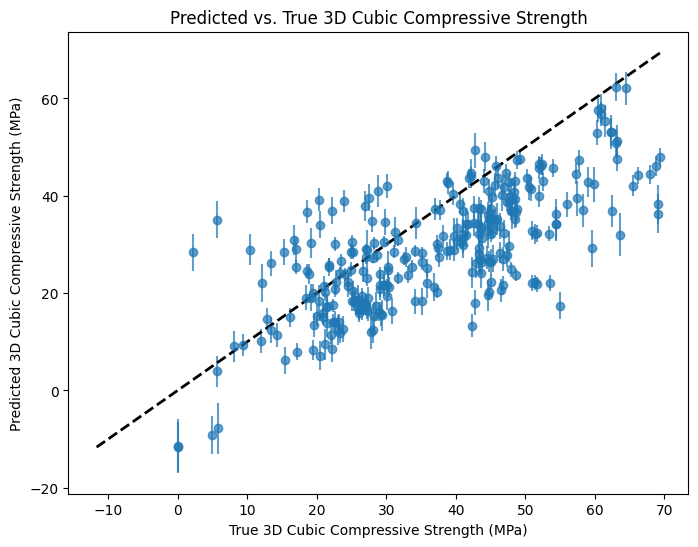

In [15]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
# Read the new CSV file
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')

# Keep rows where "14-d Cubic compressive strength (MPa) " is not missing
# (Make sure the column name exactly matches what is in your CSV file.)
df_new = df_new[df_new["3-d Cubic compressive strength (MPa)"].notna()]

# Define the same feature columns as used during training
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Fill missing values for specific features with the median
df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

# Extract features and 14-day target
X_new = df_new[feature_cols].values
y_new = df_new["3-d Cubic compressive strength (MPa)"].values.reshape(-1, 1)

# Scale the features using the previously trained scaler (assumed to be in memory)
X_new_scaled = scaler.transform(X_new)

# -------------------------
# 2. Fit a New Target Scaler on the 14-day Targets
# -------------------------
# Since your original target_scaler was built on 7d/28d data, we fit a new scaler here
new_target_scaler = StandardScaler()
y_new_scaled = new_target_scaler.fit_transform(y_new)

# -------------------------
# 3. Define a New PyTorch Dataset for 14-Day Prediction
# -------------------------
# Here we assume we want to predict the compressive strength at 14 days.
class NewConcreteDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)  # shape: (N, 1)
        # Set the new time value for prediction (14 days)
        self.t = torch.tensor([3.0], dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.targets[idx]

new_dataset = NewConcreteDataset(X_new_scaled, y_new_scaled)
new_loader = DataLoader(new_dataset, batch_size=len(new_dataset))

# -------------------------
# 4. Perform MC Dropout Inference with the Trained Model
# -------------------------
# The function mc_predict_with_uncertainty enables dropout during inference to estimate uncertainty.
mc_mean_new, mc_var_new = mc_predict_with_uncertainty(model_final, new_loader, new_dataset.t, num_samples=50)

# At this point, mc_mean_new is in the scaled space of the training target scaler.
# To compare with the new targets (scaled by new_target_scaler), we need to first invert the model output back to original units,
# then re-scale using new_target_scaler.

# Invert the model predictions using the training target_scaler parameters (here using the first dimension as proxy)
y_pred_original = mc_mean_new * target_scaler.scale_[0] + target_scaler.mean_[0]
# Also adjust the uncertainty accordingly
std_original = np.sqrt(mc_var_new) * target_scaler.scale_[0]

# Now, re-scale these predictions into the new target scaling space.
y_pred_new_scaled = new_target_scaler.transform(y_pred_original.reshape(-1, 1))
# For uncertainty, a rough approximation is to scale the std deviations similarly:
std_new_scaled = std_original / target_scaler.scale_[0] * new_target_scaler.scale_[0]

# -------------------------
# 5. Evaluate and Visualize the Predictions in the New Scaled Space
# -------------------------
# Calculate the R² score comparing the scaled new target values and the scaled predictions.
r2_new = r2_score(y_new_scaled, y_pred_new_scaled)
print("R² score on new 3-day data (in scaled space):", r2_new)

# Plot predicted vs. true compressive strength with uncertainty error bars (in original MPa units).
# You can also plot in the new scaled space if preferred.
plt.figure(figsize=(8, 6))
plt.errorbar(y_new.flatten(), y_pred_original.flatten(), yerr=std_original.flatten(), fmt='o', alpha=0.7)
min_val = min(y_new.min(), y_pred_original.min())
max_val = max(y_new.max(), y_pred_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True 3D Cubic Compressive Strength (MPa)")
plt.ylabel("Predicted 3D Cubic Compressive Strength (MPa)")
plt.title("Predicted vs. True 3D Cubic Compressive Strength")
plt.show()


R² score on new 3-day data: 0.6468131575897054


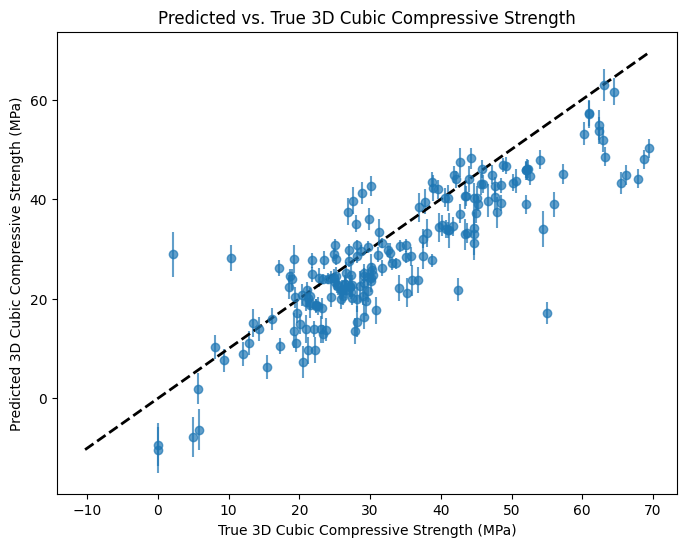

Indices of inaccurate points: [ 12  18  19  20  21  24  25  26  30  33  36  39  40  42  49  51  52  55
  58  59  62  64  65  88 118 123 125 190 191]


In [106]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
# Read the new CSV file
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')
df_new = df_new[~df_new["Ref."].isin(["[9]", "[12]", "[12]", "[83]", "[39]", "[45]","[40]"])]

# Keep rows where "3-d Cubic compressive strength (MPa)" is not missing
df_new = df_new[df_new["3-d Cubic compressive strength (MPa)"].notna()]

# Define the same feature columns as used during training
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Fill missing values for specific features with the median
df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

# Extract features and target
X_new = df_new[feature_cols].values
y_new = df_new["3-d Cubic compressive strength (MPa)"].values.reshape(-1, 1)

# Scale the features using the previously trained scaler (assumed to be in memory)
X_new_scaled = scaler.transform(X_new)

# We do NOT scale the new target data since our trained target_scaler is for 7d/28d targets.
# Instead, we use the original y_new values for evaluation.

# -------------------------
# 2. Define a New PyTorch Dataset for 3-Day Prediction
# -------------------------
# Here we assume we want to predict the compressive strength at 3 days.
class NewConcreteDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)  # shape: (N, 1)
        # Set the new time value for prediction (3 days)
        self.t = torch.tensor([3.0], dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.targets[idx]

new_dataset = NewConcreteDataset(X_new_scaled, y_new)
new_loader = DataLoader(new_dataset, batch_size=len(new_dataset))

# -------------------------
# 3. Perform MC Dropout Inference with the Trained Model
# -------------------------
# The function mc_predict_with_uncertainty enables dropout during inference to estimate uncertainty.
mc_mean_new, mc_var_new = mc_predict_with_uncertainty(model_final, new_loader, new_dataset.t, num_samples=50)

# Note: mc_mean_new is in the scaled target space (as the model was trained on scaled targets).
# To compare with the original 3-day targets (in MPa), we manually invert the scaling.
# Since target_scaler was fitted on two dimensions, we use the first dimension (associated with 7-day data) as a proxy.
y_pred_new = mc_mean_new * target_scaler.scale_[0] + target_scaler.mean_[0]
std_new = np.sqrt(mc_var_new) * target_scaler.scale_[0]  # Scale the standard deviation similarly

# -------------------------
# 4. Evaluate and Visualize the Predictions
# -------------------------
# Calculate the R² score comparing the original target values and the predicted values.
r2_new = r2_score(y_new, y_pred_new)
print("R² score on new 3-day data:", r2_new)

# Plot predicted vs. true compressive strength with uncertainty error bars.
plt.figure(figsize=(8, 6))
plt.errorbar(y_new.flatten(), y_pred_new.flatten(), yerr=std_new.flatten(), fmt='o', alpha=0.7)
min_val = min(y_new.min(), y_pred_new.min())
max_val = max(y_new.max(), y_pred_new.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True 3D Cubic Compressive Strength (MPa)")
plt.ylabel("Predicted 3D Cubic Compressive Strength (MPa)")
plt.title("Predicted vs. True 3D Cubic Compressive Strength")
plt.show()

# -------------------------
# 5. Identify and Print the Indices of Inaccurate Points
# -------------------------
# Compute absolute errors for each sample
abs_errors = np.abs(y_new.flatten() - y_pred_new.flatten())

# Define a threshold for "inaccuracy" as (mean error + 1 std of errors)
error_threshold = np.mean(abs_errors) + np.std(abs_errors)
inaccurate_indices = np.where(abs_errors > error_threshold)[0]

print("Indices of inaccurate points:", inaccurate_indices)


In [69]:
# -------------------------
# 6. Print Combined Predicted Results and Original Data Sorted by Accuracy
# -------------------------

# Create a DataFrame for the predicted results
pred_results_all = pd.DataFrame({
    "True (MPa)": y_new.flatten(),
    "Predicted (MPa)": y_pred_new.flatten(),
    "Std (MPa)": std_new.flatten(),
    "Absolute Error": abs_errors
})

# Print total number of predictions
print("Total number of predicted points:", len(pred_results_all))

# Sort prediction results by Absolute Error (ascending = most accurate first)
pred_results_sorted = pred_results_all.sort_values(by="Absolute Error", ascending=True)

# Reorder the original data using the same sorted indices
df_original_sorted = df_new.reset_index(drop=True).iloc[pred_results_sorted.index]

# Concatenate prediction results with full original data
full_combined = pd.concat([pred_results_sorted.reset_index(drop=True), df_original_sorted.reset_index(drop=True)], axis=1)

# Print the full combined DataFrame
print("\nFull Combined Prediction Results and Original Data (Sorted by Accuracy):")
print(full_combined)


Total number of predicted points: 196

Full Combined Prediction Results and Original Data (Sorted by Accuracy):
     True (MPa)  Predicted (MPa)  Std (MPa)  Absolute Error Idx_Sample   Ref.  \
0       45.8500        45.841400   1.637568        0.008600        192   [11]   
1       14.3000        14.247770   2.987884        0.052230        753   [49]   
2       28.1000        28.193180   1.195309        0.093180        964   [72]   
3       16.2000        16.027090   2.893896        0.172910        755   [49]   
4       24.1000        23.862211   1.380237        0.237789        871   [62]   
5       24.4500        24.105850   1.914933        0.344150        967   [72]   
6       27.0600        27.468557   1.306727        0.408557        961   [72]   
7       63.0400        62.582073   2.562841        0.457927       1013   [76]   
8       40.5600        40.067604   1.739521        0.492396       1305   [92]   
9       29.7400        30.370167   1.033500        0.630167        971   [72] 

In [70]:
# Assuming 'df_new' is your original DataFrame (after filtering for non-missing target and "Ref." if applicable)
# and 'inaccurate_indices' contains the indices of the inaccurate points.

# Print the original data for the inaccurate points (all columns)
df_inaccurate_original = df_new.iloc[inaccurate_indices]
print("Original data for inaccurate points:")
print(df_inaccurate_original)


Original data for inaccurate points:
    Idx_Sample  Ref. Mixture Code in Ref       SiO2      Al2O3     Fe2O3  \
344        365  [20]                  S5  51.300000  30.100000  4.570000   
417        426  [28]                  M2  58.519000  22.017500  4.561000   
418        427  [28]                  M3  57.038000  21.335000  4.522000   
419        428  [28]                  M4  55.557000  20.652500  4.483000   
548        557  [35]          Mix 6 T80º  42.040000  33.600000  4.400000   
569        578  [36]                GPC3  49.165000  22.235000  1.075000   
570        579  [36]                GPC4  49.165000  22.235000  1.075000   
571        580  [36]                GPC5  49.165000  22.235000  1.075000   
587        596  [38]    (no name on Ref)  30.970000  17.410000  1.030000   
590        599  [38]    (no name on Ref)  30.970000  17.410000  1.030000   
593        602  [38]    (no name on Ref)  30.970000  17.410000  1.030000   
596        605  [38]    (no name on Ref)  30.970000

In [71]:
import pandas as pd

# Configure Pandas display to show everything
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     # Optional: comment out if too long
pd.set_option('display.width', 0)
pd.set_option('display.max_colwidth', None)

# Print total number of predictions
print("Total number of predicted points:", len(pred_results_all))

# Sort and combine prediction results with original data
pred_results_sorted = pred_results_all.sort_values(by="Absolute Error", ascending=True)
df_original_sorted = df_new.reset_index(drop=True).iloc[pred_results_sorted.index]
full_combined = pd.concat([pred_results_sorted.reset_index(drop=True), df_original_sorted.reset_index(drop=True)], axis=1)

# Print everything
print("\nFull Combined Prediction Results and Original Data (Sorted by Accuracy):")
print(full_combined.head)


Total number of predicted points: 196

Full Combined Prediction Results and Original Data (Sorted by Accuracy):
<bound method NDFrame.head of      True (MPa)  Predicted (MPa)  Std (MPa)  Absolute Error Idx_Sample   Ref.  \
0       45.8500        45.841400   1.637568        0.008600        192   [11]   
1       14.3000        14.247770   2.987884        0.052230        753   [49]   
2       28.1000        28.193180   1.195309        0.093180        964   [72]   
3       16.2000        16.027090   2.893896        0.172910        755   [49]   
4       24.1000        23.862211   1.380237        0.237789        871   [62]   
5       24.4500        24.105850   1.914933        0.344150        967   [72]   
6       27.0600        27.468557   1.306727        0.408557        961   [72]   
7       63.0400        62.582073   2.562841        0.457927       1013   [76]   
8       40.5600        40.067604   1.739521        0.492396       1305   [92]   
9       29.7400        30.370167   1.033500     

R² score on new 14-day data: 0.5058003979380032


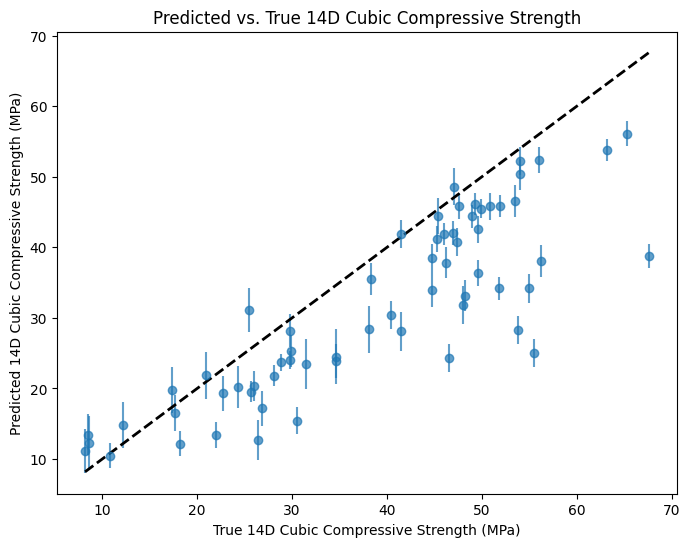

Indices of inaccurate points: [16 17 18 19 23 24 26 27 37 42]


In [85]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
# Read the new CSV file
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')
df_new = df_new[~df_new["Ref."].isin(["[40]", "[41]"])]

# Keep rows where "3-d Cubic compressive strength (MPa)" is not missing
df_new = df_new[df_new["14-d Cubic compressive strength (MPa) "].notna()]

# Define the same feature columns as used during training
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Fill missing values for specific features with the median
df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

# Extract features and target
X_new = df_new[feature_cols].values
y_new = df_new["14-d Cubic compressive strength (MPa) "].values.reshape(-1, 1)

# Scale the features using the previously trained scaler (assumed to be in memory)
X_new_scaled = scaler.transform(X_new)

# We do NOT scale the new target data since our trained target_scaler is for 7d/28d targets.
# Instead, we use the original y_new values for evaluation.

# -------------------------
# 2. Define a New PyTorch Dataset for 3-Day Prediction
# -------------------------
# Here we assume we want to predict the compressive strength at 3 days.
class NewConcreteDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)  # shape: (N, 1)
        # Set the new time value for prediction (3 days)
        self.t = torch.tensor([14.0], dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.targets[idx]

new_dataset = NewConcreteDataset(X_new_scaled, y_new)
new_loader = DataLoader(new_dataset, batch_size=len(new_dataset))

# -------------------------
# 3. Perform MC Dropout Inference with the Trained Model
# -------------------------
# The function mc_predict_with_uncertainty enables dropout during inference to estimate uncertainty.
mc_mean_new, mc_var_new = mc_predict_with_uncertainty(model_final, new_loader, new_dataset.t, num_samples=50)

# Note: mc_mean_new is in the scaled target space (as the model was trained on scaled targets).
# To compare with the original 3-day targets (in MPa), we manually invert the scaling.
# Since target_scaler was fitted on two dimensions, we use the first dimension (associated with 7-day data) as a proxy.
y_pred_new = mc_mean_new * target_scaler.scale_[0] + target_scaler.mean_[0]
std_new = np.sqrt(mc_var_new) * target_scaler.scale_[0]  # Scale the standard deviation similarly

# -------------------------
# 4. Evaluate and Visualize the Predictions
# -------------------------
# Calculate the R² score comparing the original target values and the predicted values.
r2_new = r2_score(y_new, y_pred_new)
print("R² score on new 14-day data:", r2_new)

# Plot predicted vs. true compressive strength with uncertainty error bars.
plt.figure(figsize=(8, 6))
plt.errorbar(y_new.flatten(), y_pred_new.flatten(), yerr=std_new.flatten(), fmt='o', alpha=0.7)
min_val = min(y_new.min(), y_pred_new.min())
max_val = max(y_new.max(), y_pred_new.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True 14D Cubic Compressive Strength (MPa)")
plt.ylabel("Predicted 14D Cubic Compressive Strength (MPa)")
plt.title("Predicted vs. True 14D Cubic Compressive Strength")
plt.show()

# -------------------------
# 5. Identify and Print the Indices of Inaccurate Points
# -------------------------
# Compute absolute errors for each sample
abs_errors = np.abs(y_new.flatten() - y_pred_new.flatten())

# Define a threshold for "inaccuracy" as (mean error + 1 std of errors)
error_threshold = np.mean(abs_errors) + np.std(abs_errors)
inaccurate_indices = np.where(abs_errors > error_threshold)[0]

print("Indices of inaccurate points:", inaccurate_indices)


In [84]:
# -------------------------
# 5. Identify and Print the Indices of Inaccurate Points
# -------------------------
# Compute absolute errors for each sample
abs_errors = np.abs(y_new.flatten() - y_pred_new.flatten())

# Define a threshold for "inaccuracy" as (mean error + 1 std of errors)
error_threshold = np.mean(abs_errors) + np.std(abs_errors)
inaccurate_indices = np.where(abs_errors > error_threshold)[0]

print("Indices of inaccurate points:", inaccurate_indices)

# -------------------------
# Print the number of predicted points and the full original dataset
# -------------------------
print("Number of predicted points:", len(y_pred_new))
print("Shape of the original dataset:", df_new.shape)
print("Full original dataset:")
print(df_new)


Indices of inaccurate points: [16 17 18 19 23 24 26 27 37]
Number of predicted points: 63
Shape of the original dataset: (63, 76)
Full original dataset:
     Idx_Sample   Ref. Mixture Code in Ref       SiO2      Al2O3     Fe2O3  \
144         147    [7]                 NaN  61.180000  25.000000  6.470000   
145         148    [7]                 NaN  61.180000  25.000000  6.470000   
146         149    [7]                 NaN  61.180000  25.000000  6.470000   
147         150    [7]                 NaN  61.180000  25.000000  6.470000   
585         594   [38]    (no name on Ref)  30.970000  17.410000  1.030000   
586         595   [38]    (no name on Ref)  30.970000  17.410000  1.030000   
587         596   [38]    (no name on Ref)  30.970000  17.410000  1.030000   
588         597   [38]    (no name on Ref)  30.970000  17.410000  1.030000   
589         598   [38]    (no name on Ref)  30.970000  17.410000  1.030000   
590         599   [38]    (no name on Ref)  30.970000  17.410000  1

R² score on new 3-day data: 0.6494068921421773


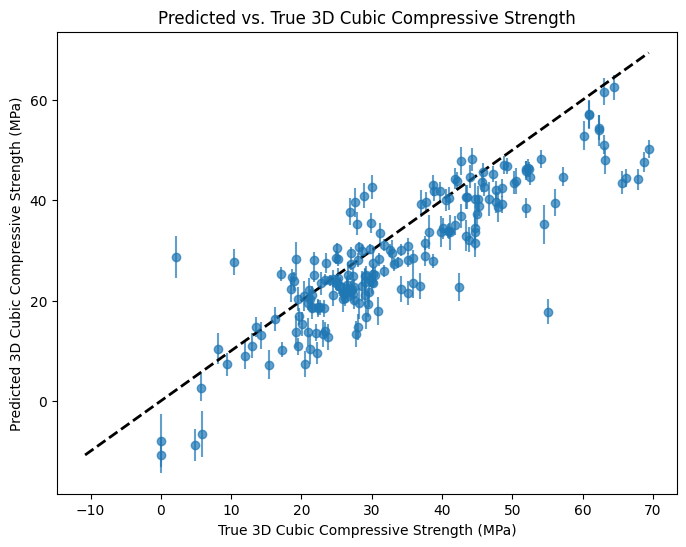

Indices of inaccurate points: [ 12  18  19  20  21  24  25  26  30  33  36  39  40  42  49  51  52  55
  58  59  62  64  65  88 118 123 125 190 191]


In [126]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')
df_new = df_new[~df_new["Ref."].isin(["[9]", "[12]", "[12]", "[83]", "[39]", "[45]","[40]"])]
df_new = df_new[df_new["3-d Cubic compressive strength (MPa)"].notna()]

feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

X_new = df_new[feature_cols].values
y_new = df_new["3-d Cubic compressive strength (MPa)"].values.reshape(-1, 1)

# 假設 scaler 已在內存中（訓練時用過）
X_new_scaled = scaler.transform(X_new)

# -------------------------
# 2. 定義 NewConcreteDataset 用於 3 天預測
# -------------------------
class NewConcreteDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)  # shape: (N, 1)
        # 預測時設定固定時間 t = 3 天
        self.t = torch.tensor([3.0], dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.targets[idx]

new_dataset = NewConcreteDataset(X_new_scaled, y_new)
new_loader = DataLoader(new_dataset, batch_size=len(new_dataset))

# -------------------------
# 3. 進行 MC Dropout 推論 (本部分保留原始程式碼)
# -------------------------
mc_mean_new, mc_var_new = mc_predict_with_uncertainty(model_final, new_loader, new_dataset.t, num_samples=50)
y_pred_new = mc_mean_new * target_scaler.scale_[0] + target_scaler.mean_[0]
std_new = np.sqrt(mc_var_new) * target_scaler.scale_[0]
r2_new = r2_score(y_new, y_pred_new)
print("R² score on new 3-day data:", r2_new)

plt.figure(figsize=(8, 6))
plt.errorbar(y_new.flatten(), y_pred_new.flatten(), yerr=std_new.flatten(), fmt='o', alpha=0.7)
min_val = min(y_new.min(), y_pred_new.min())
max_val = max(y_new.max(), y_pred_new.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True 3D Cubic Compressive Strength (MPa)")
plt.ylabel("Predicted 3D Cubic Compressive Strength (MPa)")
plt.title("Predicted vs. True 3D Cubic Compressive Strength")
plt.show()

abs_errors = np.abs(y_new.flatten() - y_pred_new.flatten())
error_threshold = np.mean(abs_errors) + np.std(abs_errors)
inaccurate_indices = np.where(abs_errors > error_threshold)[0]
print("Indices of inaccurate points:", inaccurate_indices)



In [137]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# -------------------------
# 1. Read and Preprocess the New Data
# -------------------------
df_new = pd.read_csv(r'/root/autodl-tmp/3d AAC concrete dataset large ratio.csv')
df_new = df_new[~df_new["Ref."].isin(["[9]", "[12]", "[12]", "[83]", "[39]", "[45]","[40]"])]
df_new = df_new[df_new["3-d Cubic compressive strength (MPa)"].notna()]

feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

df_new["Na2O"] = df_new["Na2O"].fillna(df_new["Na2O"].median())
df_new["Concentration (M) NaOH"] = df_new["Concentration (M) NaOH"].fillna(df_new["Concentration (M) NaOH"].median())

X_new = df_new[feature_cols].values
y_new = df_new["3-d Cubic compressive strength (MPa)"].values.reshape(-1, 1)

# 假設 scaler 已在內存中（訓練時用過）
X_new_scaled = scaler.transform(X_new)

# -------------------------
# 2. 定義用於預測的數據集類 (使用 dummy 目標)
# -------------------------
class NewConcreteDatasetPredict(Dataset):
    def __init__(self, features, t_value):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.t = torch.tensor([t_value], dtype=torch.float32)
        # dummy targets，全零佔位
        self.dummy = torch.zeros((self.features.shape[0], 1), dtype=torch.float32)
    def __len__(self):
        return self.features.shape[0]
    def __getitem__(self, idx):
        return self.features[idx], self.t, self.dummy[idx]

# 建立三個數據集：用於 t=3、t=7 與 t=28 的預測
new_dataset_3 = NewConcreteDatasetPredict(X_new_scaled, t_value=3.0)
new_dataset_7 = NewConcreteDatasetPredict(X_new_scaled, t_value=7.0)
new_dataset_28 = NewConcreteDatasetPredict(X_new_scaled, t_value=28.0)

new_loader_3 = DataLoader(new_dataset_3, batch_size=len(new_dataset_3))
new_loader_7 = DataLoader(new_dataset_7, batch_size=len(new_dataset_7))
new_loader_28 = DataLoader(new_dataset_28, batch_size=len(new_dataset_28))

# -------------------------
# 3. 利用 MC Dropout 預測 t=3, 7 與 28 天的值
# -------------------------
# 以下預測均使用 mc_predict_with_uncertainty 函數，該函數返回的預測值在縮放後空間。

# 預測 t = 3 天（反縮放時採用 target_scaler 的第一維參數）
mc_mean_3, mc_var_3 = mc_predict_with_uncertainty(model_final, new_loader_3, new_dataset_3.t, num_samples=50)
y_pred_3 = mc_mean_3 * target_scaler.scale_[0] + target_scaler.mean_[0]
std_3 = np.sqrt(mc_var_3) * target_scaler.scale_[0]

# 預測 t = 7 天（同上，使用第一維參數）
mc_mean_7, mc_var_7 = mc_predict_with_uncertainty(model_final, new_loader_7, new_dataset_7.t, num_samples=50)
y_pred_7 = mc_mean_7 * target_scaler.scale_[0] + target_scaler.mean_[0]
std_7 = np.sqrt(mc_var_7) * target_scaler.scale_[0]

# 預測 t = 28 天（使用 target_scaler 第二維參數）
mc_mean_28, mc_var_28 = mc_predict_with_uncertainty(model_final, new_loader_28, new_dataset_28.t, num_samples=50)
y_pred_28 = mc_mean_28 * target_scaler.scale_[1] + target_scaler.mean_[1]
std_28 = np.sqrt(mc_var_28) * target_scaler.scale_[1]

# -------------------------
# 4. 整理預測結果並與原始資料合併
# -------------------------
# 這裡 y_new 為 3 天真實值
pred_results_all = pd.DataFrame({
    "True (3-day) (MPa)": y_new.flatten(),
    "Predicted (3-day) (MPa)": y_pred_3.flatten(),
    "Std (3-day) (MPa)": std_3.flatten(),
    "Predicted (7-day) (MPa)": y_pred_7.flatten(),
    "Std (7-day) (MPa)": std_7.flatten(),
    "Predicted (28-day) (MPa)": y_pred_28.flatten(),
    "Std (28-day) (MPa)": std_28.flatten()
})

print("Total number of predicted points:", len(pred_results_all))
# 以 t=3 的預測絕對誤差排序（這裡用 3-day 預測與真實值差異）
abs_errors = np.abs(y_new.flatten() - y_pred_3.flatten())
pred_results_all["Absolute Error (3-day)"] = abs_errors

pred_results_sorted = pred_results_all.sort_values(by="Absolute Error (3-day)", ascending=True)
df_original_sorted = df_new.reset_index(drop=True).iloc[pred_results_sorted.index]

full_combined = pd.concat([pred_results_sorted.reset_index(drop=True),
                           df_original_sorted.reset_index(drop=True)], axis=1)

print("\nFull Combined Prediction Results and Original Data (Sorted by Accuracy):")
print(full_combined.head(5))


Total number of predicted points: 196

Full Combined Prediction Results and Original Data (Sorted by Accuracy):
   True (3-day) (MPa)  Predicted (3-day) (MPa)  Std (3-day) (MPa)  \
0               14.30                14.393944           2.605293   
1               40.56                40.391994           1.666538   
2               45.85                45.607231           2.036245   
3               24.10                23.846931           1.326491   
4               41.00                40.722927           2.404282   

   Predicted (7-day) (MPa)  Std (7-day) (MPa)  Predicted (28-day) (MPa)  \
0                14.575859           2.474604                 22.184566   
1                40.604404           1.736698                 47.468021   
2                46.140785           1.928282                 53.498367   
3                24.119587           1.263505                 30.401913   
4                40.658836           2.633105                 48.560287   

   Std (28-day) (MPa) 

In [141]:
# 顯示指定欄位的結果
columns_to_show = [
    "True (3-day) (MPa)",
    "Predicted (3-day) (MPa)",
    "Predicted (7-day) (MPa)",
    "Predicted (28-day) (MPa)",
    "7d CS",
    "28d CS"
]

# 確保這些欄位存在於 full_combined 中
missing_cols = [col for col in columns_to_show if col not in full_combined.columns]
if missing_cols:
    print("Warning: The following columns are missing:", missing_cols)
else:
    print("\nSelected Columns from Full Combined Results:")
    print(full_combined[columns_to_show].head(50))



Selected Columns from Full Combined Results:
    True (3-day) (MPa)  Predicted (3-day) (MPa)  Predicted (7-day) (MPa)  \
0              14.3000                14.393944                14.575859   
1              40.5600                40.391994                40.604404   
2              45.8500                45.607231                46.140785   
3              24.1000                23.846931                24.119587   
4              41.0000                40.722927                40.658836   
5              24.4500                24.144712                24.504786   
6              28.1000                28.410860                28.371111   
7              27.0600                27.446201                27.763973   
8              20.4000                20.903690                22.451933   
9              16.2000                15.633518                17.284788   
10             21.0900                21.656954                21.895567   
11             63.0400                62.3

In [144]:
# 確保數值欄轉成 float 類型（避免 string）
cols_to_convert = [
    "True (3-day) (MPa)",
    "Predicted (3-day) (MPa)",
    "7d CS",
    "Predicted (7-day) (MPa)",
    "28d CS",
    "Predicted (28-day) (MPa)"
]

for col in cols_to_convert:
    new_table[col] = pd.to_numeric(new_table[col], errors="coerce")  # 轉換成 float，錯誤轉為 NaN


In [146]:
# 新增三個差值欄位
new_table["Diff (3-day) (MPa)"] = new_table["True (3-day) (MPa)"] - new_table["Predicted (3-day) (MPa)"]
new_table["Diff (7-day) (MPa)"] = new_table["7d CS"] - new_table["Predicted (7-day) (MPa)"]
new_table["Diff (28-day) (MPa)"] = new_table["28d CS"] - new_table["Predicted (28-day) (MPa)"]

# 顯示前 50 筆結果
print("\nSimplified Comparison Table with Differences:")
print(new_table)



Simplified Comparison Table with Differences:
     True (3-day) (MPa)  Predicted (3-day) (MPa)    7d CS  \
0               14.3000                14.393944  19.6000   
1               40.5600                40.391994  46.1100   
2               45.8500                45.607231  46.9400   
3               24.1000                23.846931  29.0000   
4               41.0000                40.722927  46.1000   
5               24.4500                24.144712  32.7400   
6               28.1000                28.410860  31.3300   
7               27.0600                27.446201  29.7500   
8               20.4000                20.903690  24.6000   
9               16.2000                15.633518  22.4000   
10              21.0900                21.656954  27.6500   
11              63.0400                62.375908  66.1900   
12              31.6700                30.975365  35.8100   
13              23.4000                24.158516  27.8000   
14              25.1540               

In [147]:
new_table_sorted = new_table.copy()
new_table_sorted["Abs Diff (3-day) (MPa)"] = new_table_sorted["Diff (3-day) (MPa)"].abs()
new_table_sorted = new_table_sorted.sort_values(by="Abs Diff (3-day) (MPa)", ascending=True)

print("\nNew Table Sorted by Absolute Diff (3-day) (MPa):")
print(new_table_sorted.head(50))



New Table Sorted by Absolute Diff (3-day) (MPa):
    True (3-day) (MPa)  Predicted (3-day) (MPa)    7d CS  \
0              14.3000                14.393944  19.6000   
1              40.5600                40.391994  46.1100   
2              45.8500                45.607231  46.9400   
3              24.1000                23.846931  29.0000   
4              41.0000                40.722927  46.1000   
5              24.4500                24.144712  32.7400   
6              28.1000                28.410860  31.3300   
7              27.0600                27.446201  29.7500   
8              20.4000                20.903690  24.6000   
9              16.2000                15.633518  22.4000   
10             21.0900                21.656954  27.6500   
11             63.0400                62.375908  66.1900   
12             31.6700                30.975365  35.8100   
13             23.4000                24.158516  27.8000   
14             25.1540                24.394928  3